# Data analysis

## Read data

In [172]:
setwd('/home/steinerj/Documents/ai-b/semester-4/machine-learning/ai-b-4-ml-project/data')

In [173]:
data <- read.csv("smoking.csv",header=TRUE,sep=",",fill=TRUE,stringsAsFactors=TRUE)

In [174]:
summary(data)

       ID        gender         age          height.cm.      weight.kg.    
 Min.   :    0   F:20291   Min.   :20.00   Min.   :130.0   Min.   : 30.00  
 1st Qu.:13923   M:35401   1st Qu.:40.00   1st Qu.:160.0   1st Qu.: 55.00  
 Median :27846             Median :40.00   Median :165.0   Median : 65.00  
 Mean   :27846             Mean   :44.18   Mean   :164.6   Mean   : 65.86  
 3rd Qu.:41768             3rd Qu.:55.00   3rd Qu.:170.0   3rd Qu.: 75.00  
 Max.   :55691             Max.   :85.00   Max.   :190.0   Max.   :135.00  
   waist.cm.      eyesight.left.  eyesight.right. hearing.left.  
 Min.   : 51.00   Min.   :0.100   Min.   :0.100   Min.   :1.000  
 1st Qu.: 76.00   1st Qu.:0.800   1st Qu.:0.800   1st Qu.:1.000  
 Median : 82.00   Median :1.000   Median :1.000   Median :1.000  
 Mean   : 82.05   Mean   :1.013   Mean   :1.007   Mean   :1.026  
 3rd Qu.: 88.00   3rd Qu.:1.200   3rd Qu.:1.200   3rd Qu.:1.000  
 Max.   :129.00   Max.   :9.900   Max.   :9.900   Max.   :2.000  
 heari

Remove columnd "ID":

In [175]:
data <- subset(data, select=-ID)

In [176]:
model.data <- data.frame(smoking=data[,"smoking"])

## Analyze and preprocess data

### Smoking variable

Variable to predict/classify. Convert to a categorical variable.

In [177]:
data[,"smoking"] <- as.factor(data[,"smoking"])

### Gender variable

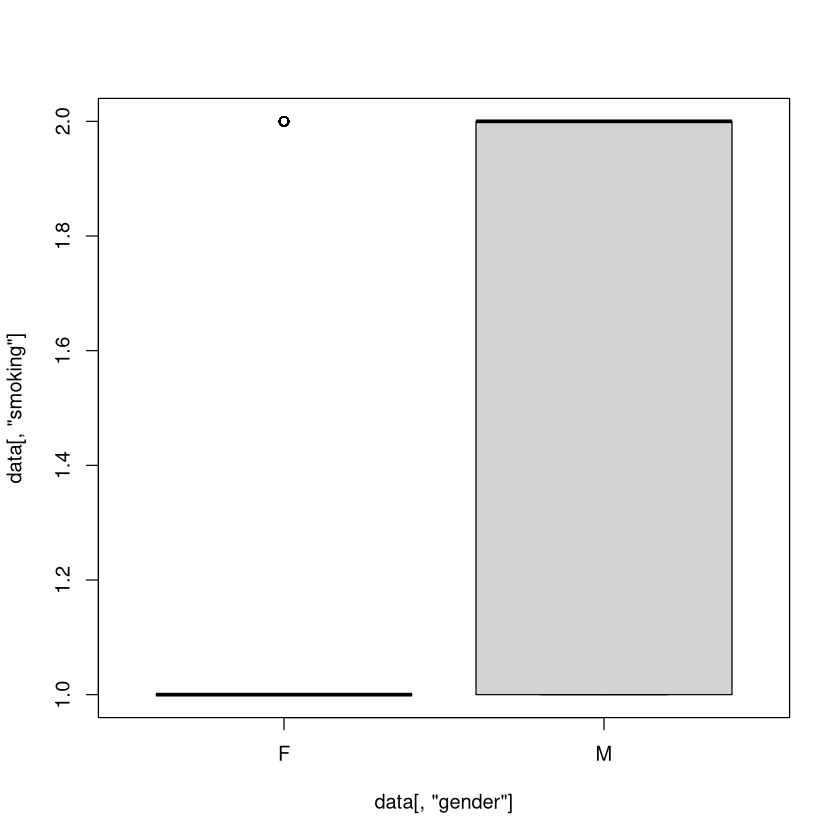

In [178]:
boxplot(data[,"smoking"] ~ data[,"gender"])

Contingency boards:

In [179]:
length(subset(data, data[,"gender"] == 'F')[,1])

[1] 20291

In [180]:
round(table(data[,c("gender","smoking")]))

      smoking
gender     0     1
     F 19432   859
     M 15805 19596

In [181]:
round(table(data[,c("gender","smoking")])/summary(data[,"gender"])*100)

      smoking
gender  0  1
     F 96  4
     M 45 55

Display number of data rows in the dataset of female smokers and male smokers.

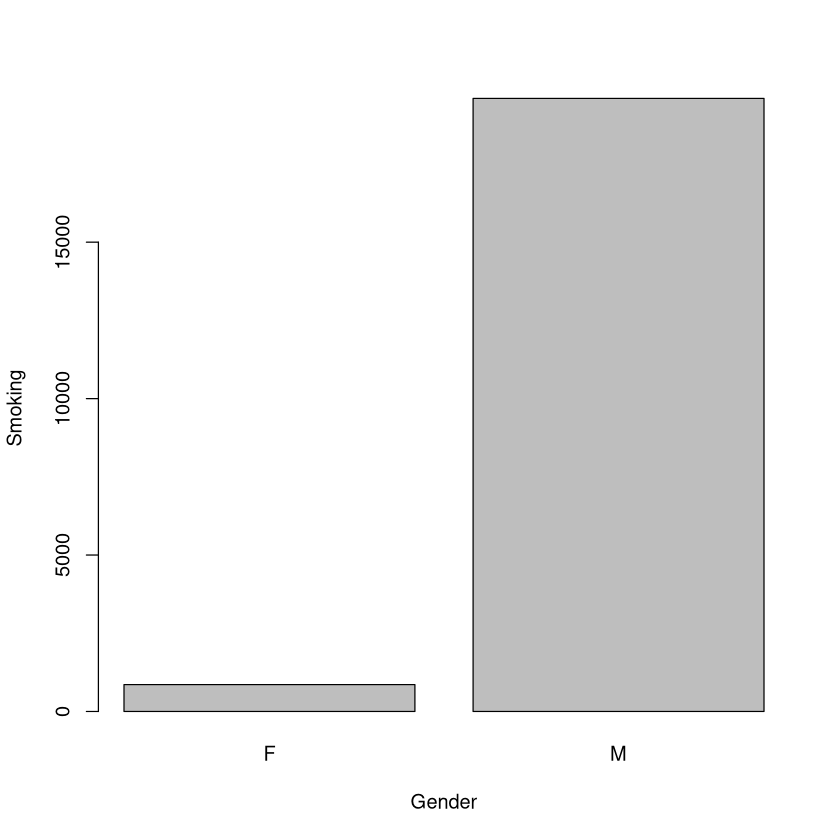

In [182]:
smoking_data <- subset(data[,"gender"],data[,"smoking"] == 1)
barplot(table(smoking_data), xlab="Gender", ylab="Smoking")

#### Conclusion

Include in machine learning model.

In [183]:
model.data <- cbind(model.data, gender=data[,"gender"])

### Age variable

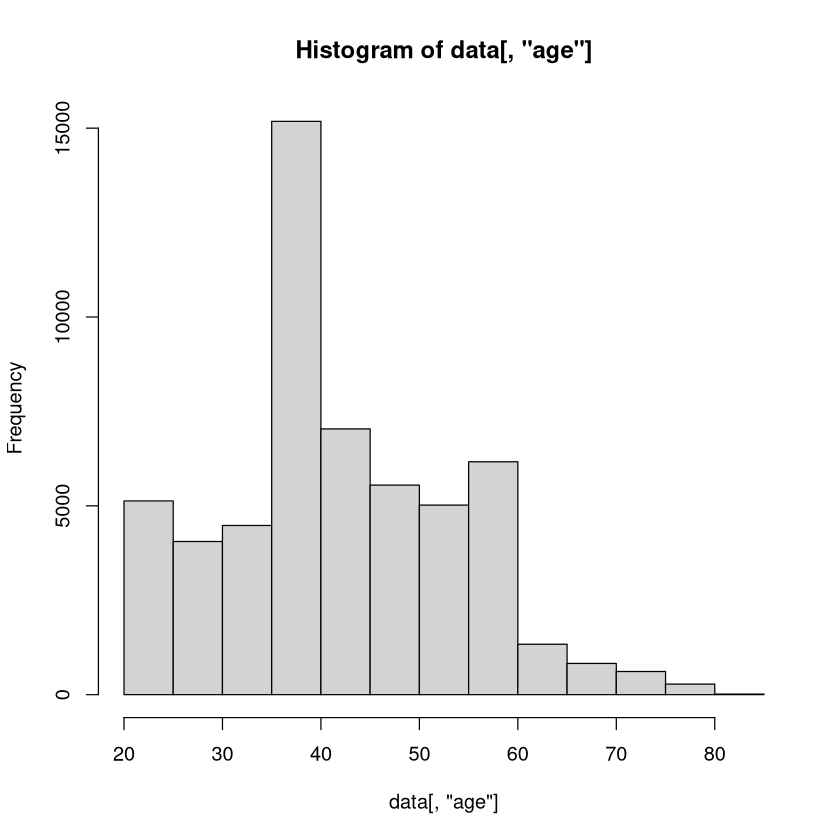

In [184]:
hist(data[,"age"])

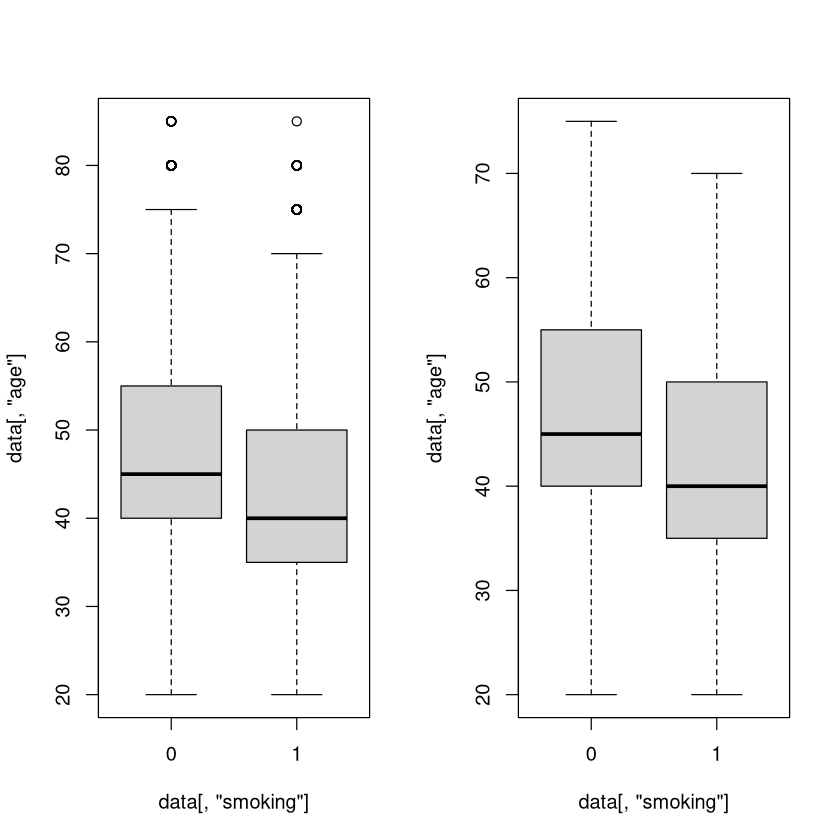

In [185]:
par(mfrow=c(1,2))
boxplot(data[,"age"] ~ data[,"smoking"])
boxplot(data[,"age"] ~ data[,"smoking"],outline=FALSE)

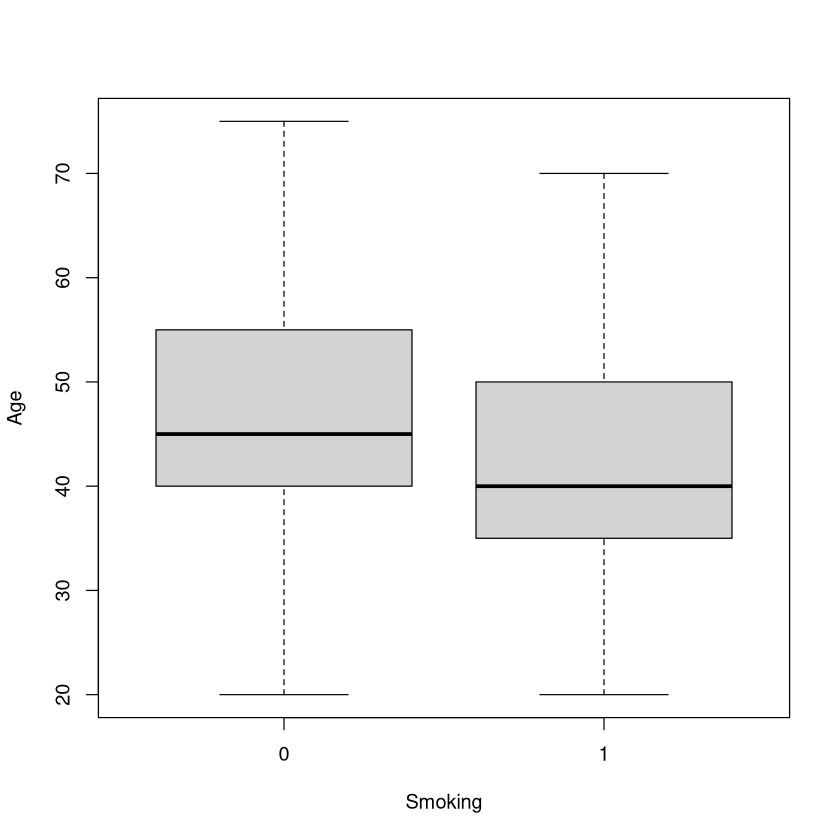

In [186]:
boxplot(data[,"age"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Age")

#### Conclusion

Add to the machine learning model.

In [187]:
model.data <- cbind(model.data, age=data[,"age"])

### Height variable

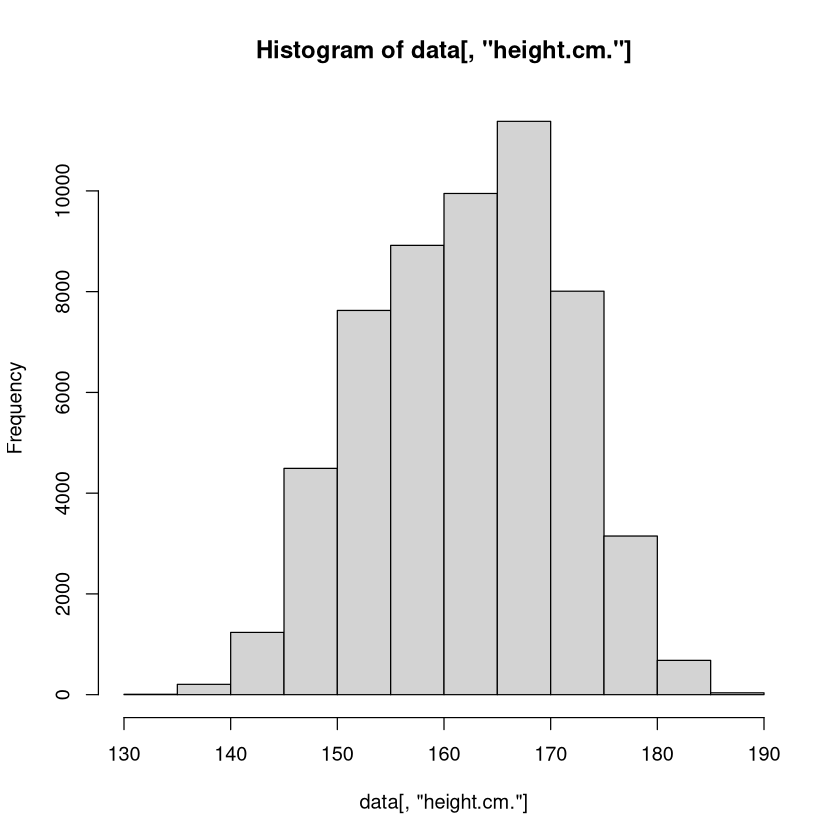

In [188]:
hist(data[,"height.cm."])

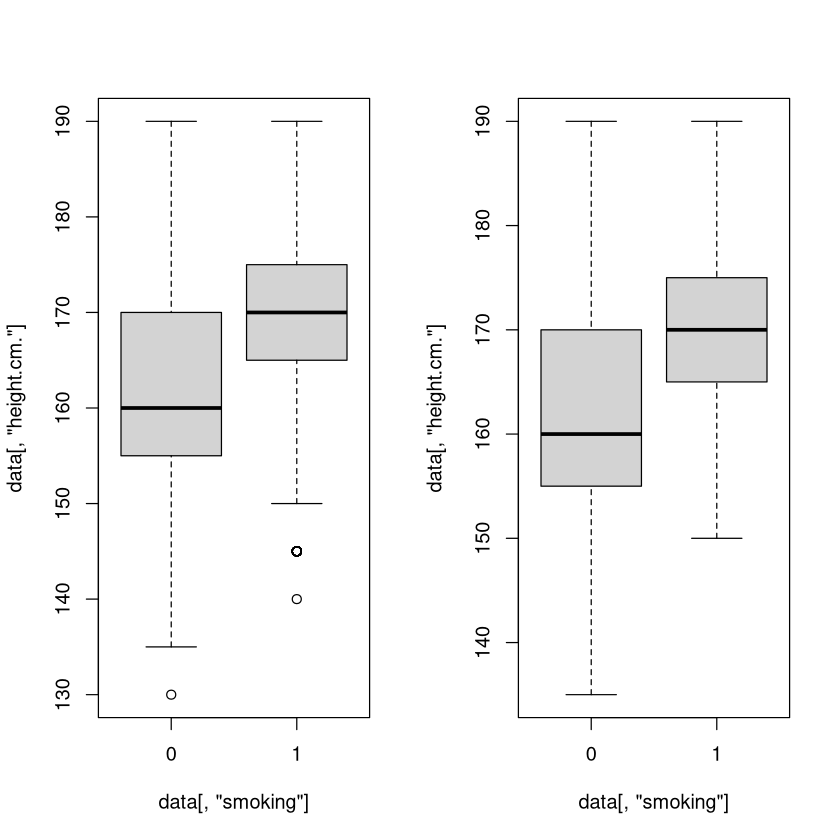

In [189]:
par(mfrow=c(1,2))
boxplot(data[,"height.cm."] ~ data[,"smoking"])
boxplot(data[,"height.cm."] ~ data[,"smoking"],outline=FALSE)

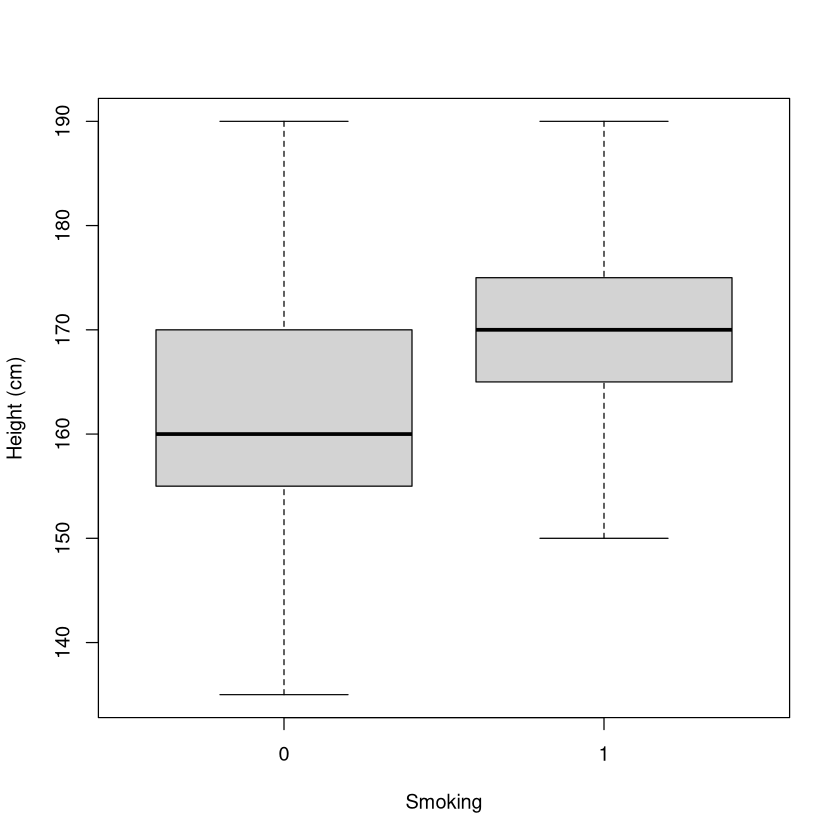

In [190]:
boxplot(data[,"height.cm."] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Height (cm)")

#### Conclusion

Based on the data, it can be seen that taller people smoke more. This variable can be included in the machine learning model.

In [191]:
model.data <- cbind(model.data, height.cm.=data[,"height.cm."])

### Weight variable

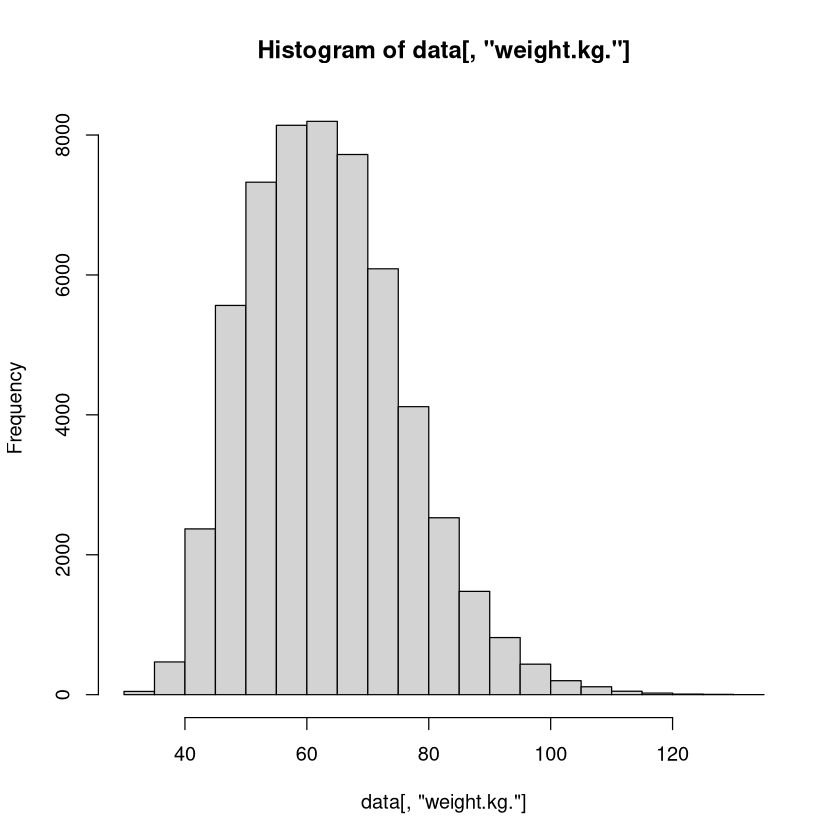

In [192]:
hist(data[,"weight.kg."])

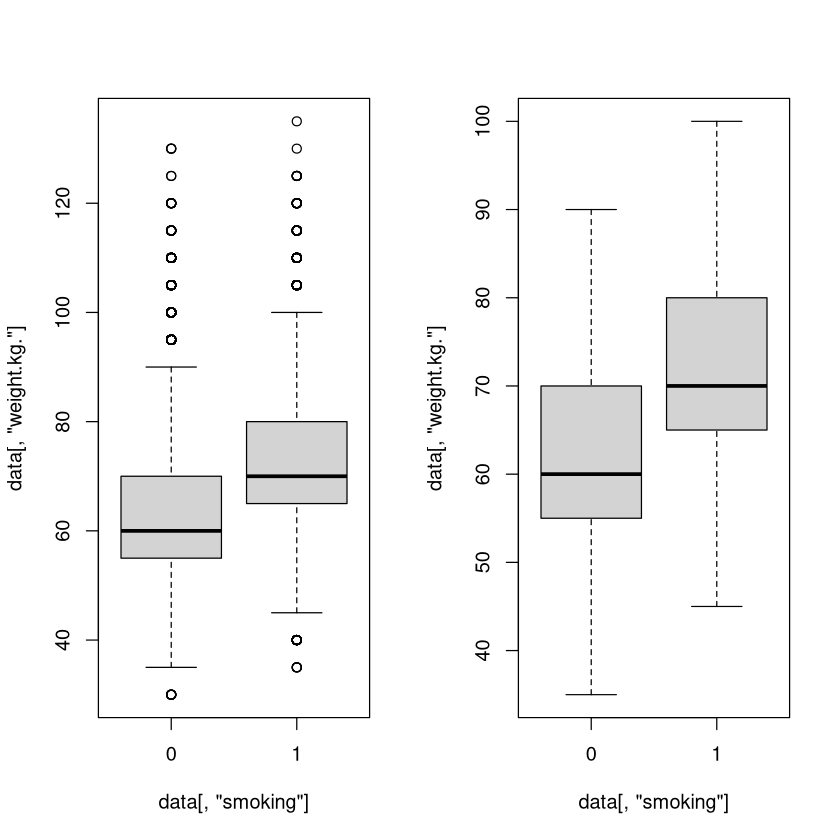

In [193]:
par(mfrow=c(1,2))
boxplot(data[,"weight.kg."] ~ data[,"smoking"])
boxplot(data[,"weight.kg."] ~ data[,"smoking"],outline=FALSE)

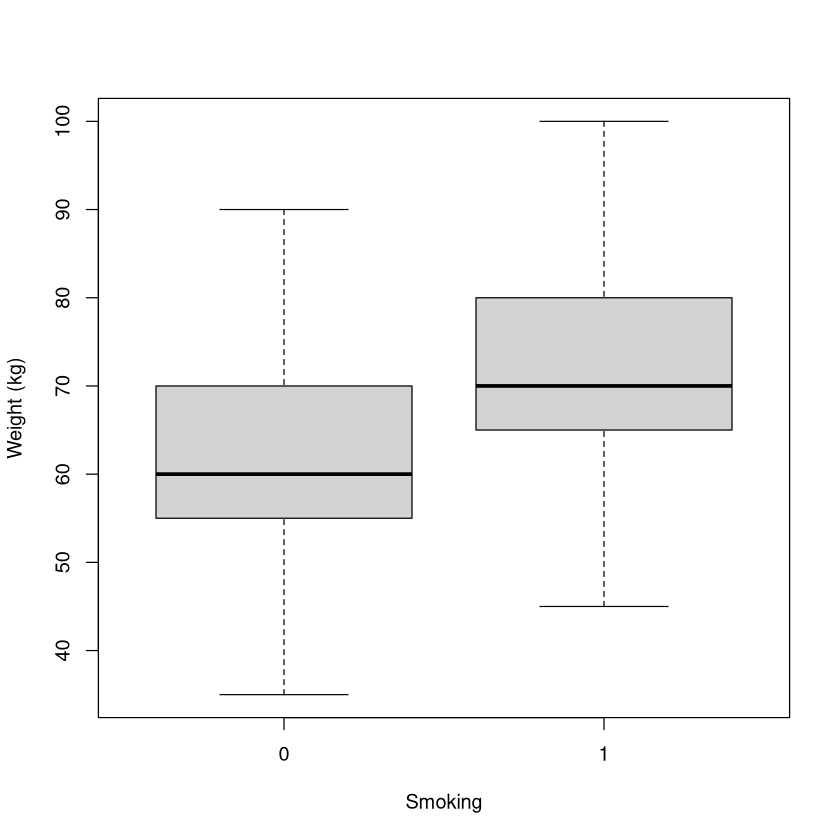

In [194]:
boxplot(data[,"weight.kg."] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Weight (kg)")

#### Conclusion

Based on the data, it can be seen that heaier people smoke more. This variable can be included in the machine learning model.

In [195]:
model.data <- cbind(model.data, weight.kg.=data[,"weight.kg."])

### Waist

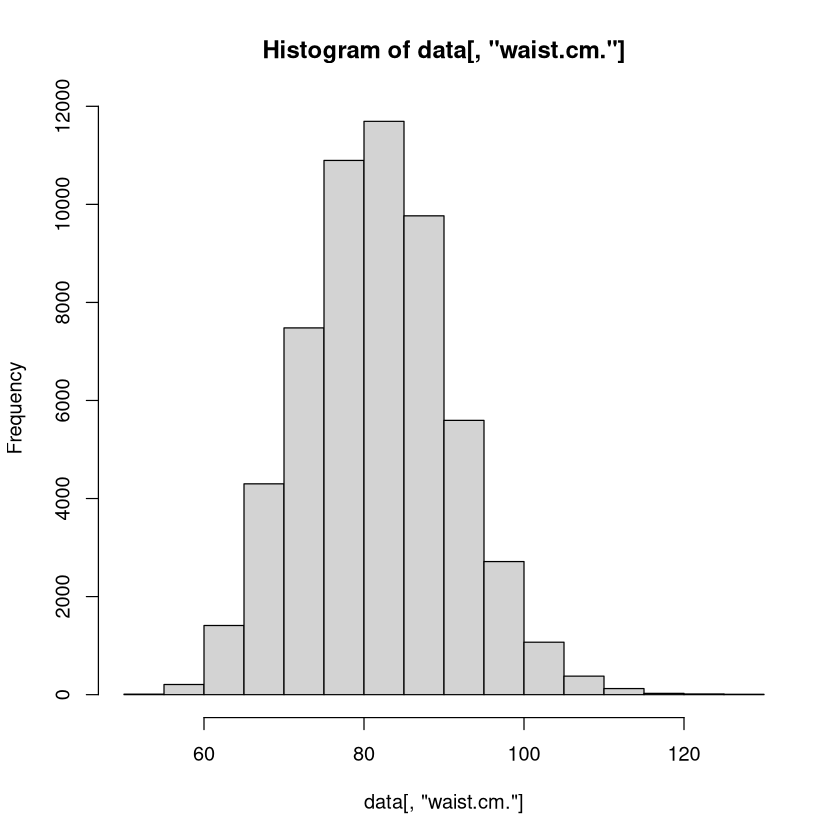

In [196]:
hist(data[,"waist.cm."])

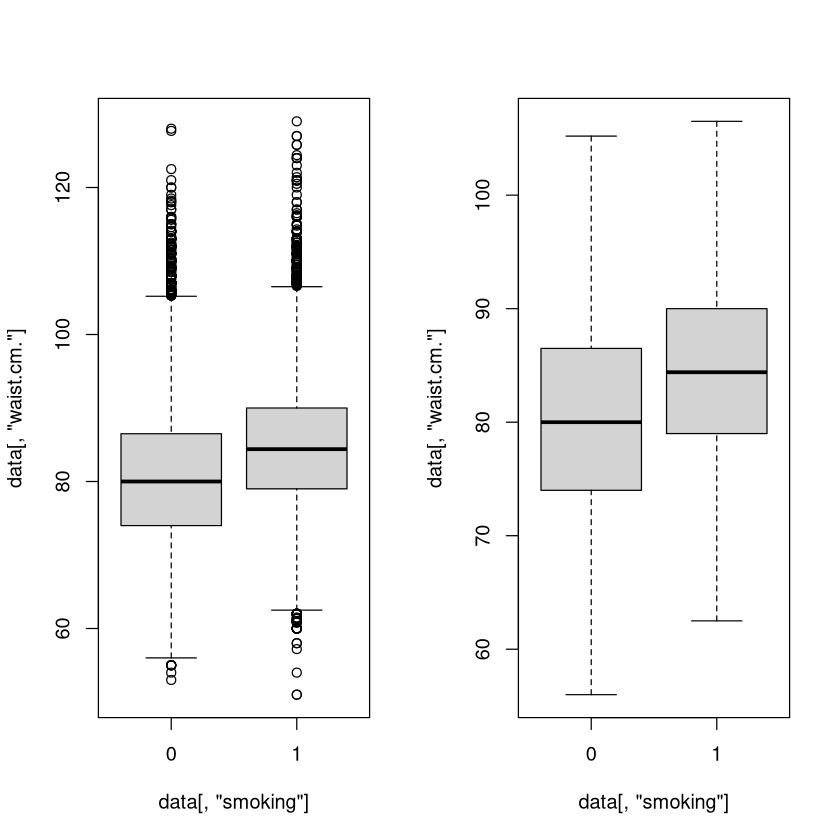

In [197]:
par(mfrow=c(1,2))
boxplot(data[,"waist.cm."] ~ data[,"smoking"])
boxplot(data[,"waist.cm."] ~ data[,"smoking"],outline=FALSE)

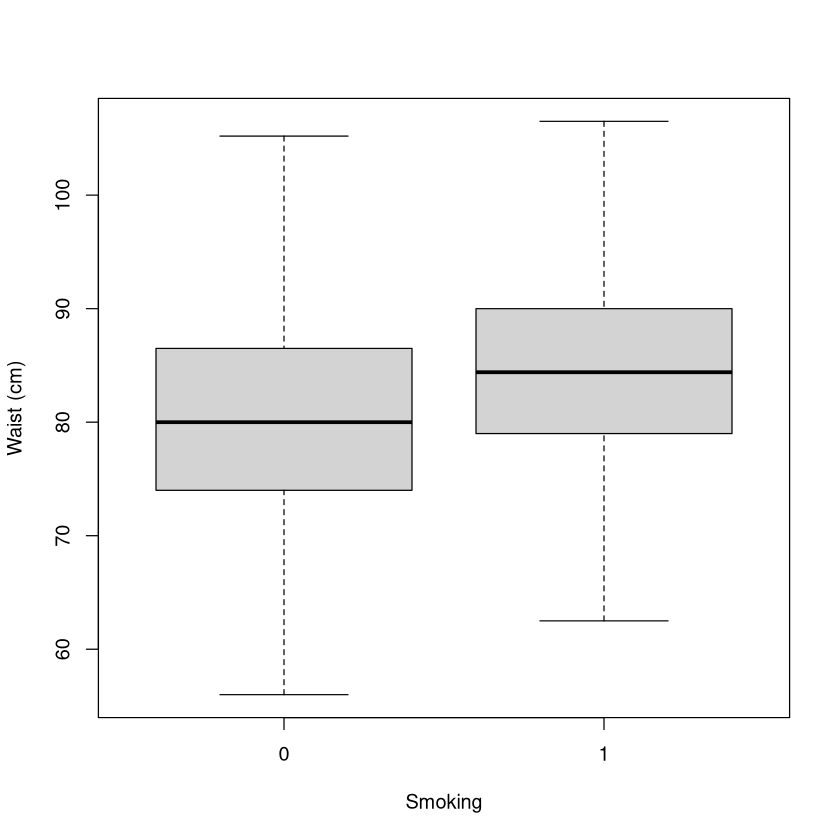

In [198]:
boxplot(data[,"waist.cm."] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Waist (cm)")

### Eyesight (left & right)

In [199]:
data[1:10,c("eyesight.left.","eyesight.right.")]

,eyesight.left.,eyesight.right.
,<dbl>,<dbl>
1,1.2,1.0
2,0.8,0.6
3,0.8,0.8
4,1.5,1.5
5,1.0,1.0
6,1.2,1.2
7,1.0,1.0
8,1.2,1.0
9,0.7,0.8


In [200]:
sort(unique(data[,"eyesight.left."]))

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.5 1.6 1.8 1.9 2.0 9.9

In [201]:
sort(unique(data[,"eyesight.right."]))

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.5 1.6 2.0 9.9

Convert both variables to categorical variables.

In [202]:
data[,"eyesight.left."] <- as.factor(data[,"eyesight.left."])
data[,"eyesight.right."] <- as.factor(data[,"eyesight.right."])

Some plots.

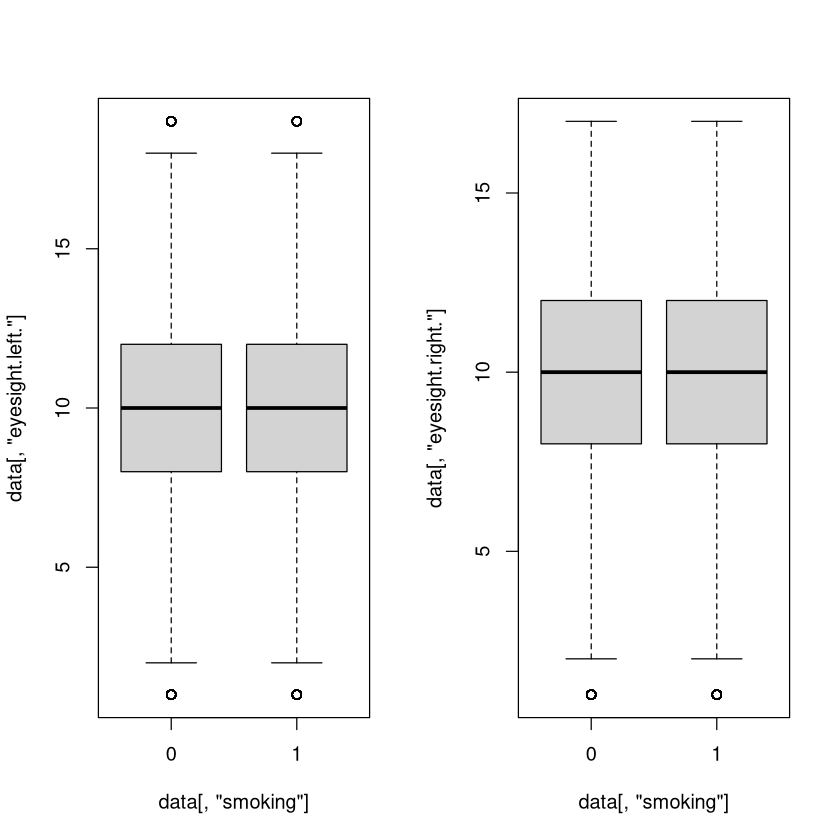

In [203]:
par(mfrow=c(1,2))
boxplot(data[,"eyesight.left."] ~ data[,"smoking"])
boxplot(data[,"eyesight.right."] ~ data[,"smoking"])

Without outliers.

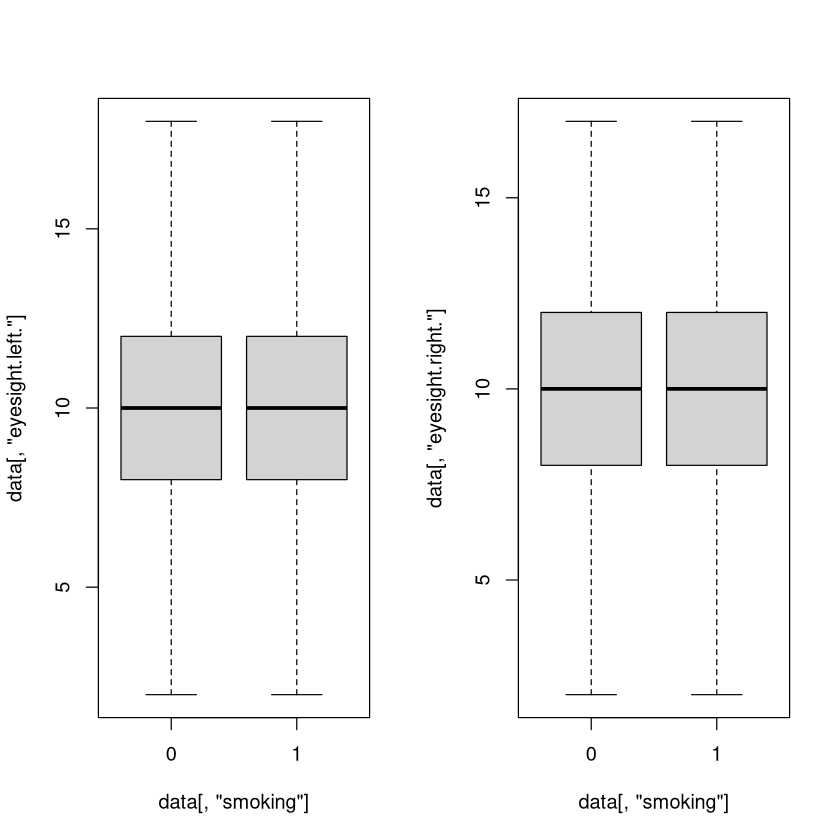

In [204]:
par(mfrow=c(1,2))
boxplot(data[,"eyesight.left."] ~ data[,"smoking"],outline=FALSE)
boxplot(data[,"eyesight.right."] ~ data[,"smoking"],outline=FALSE)

Contingency table.

In [205]:
round(table(data[,c("eyesight.left.","smoking")])/summary(data[,"eyesight.left."])*100)

              smoking
eyesight.left.   0   1
           0.1  69  31
           0.2  70  30
           0.3  69  31
           0.4  70  30
           0.5  69  31
           0.6  69  31
           0.7  69  31
           0.8  67  33
           0.9  66  34
           1    63  37
           1.1  67  33
           1.2  60  40
           1.3  60  40
           1.5  56  44
           1.6  50  50
           1.8   0 100
           1.9 100   0
           2    53  47
           9.9  64  36

Analze the datarows with eyesight.left. value 1.8 and 1.9.

In [206]:
subset(data,data["eyesight.left."] == 1.8 | data["eyesight.left."] == 1.9)

,gender,age,height.cm.,weight.kg.,waist.cm.,eyesight.left.,eyesight.right.,hearing.left.,hearing.right.,systolic,⋯,hemoglobin,Urine.protein,serum.creatinine,AST,ALT,Gtp,oral,dental.caries,tartar,smoking
,<fct>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>
15029,M,55,165,85,97,1.9,0.9,1,1,170,⋯,14.0,1,1.1,19,38,81,Y,0,Y,0
20478,M,40,175,65,75,1.8,1.2,1,1,119,⋯,14.4,1,1.1,43,26,35,Y,0,Y,1
40159,F,40,165,85,97,1.9,1.2,1,1,130,⋯,15.5,1,0.6,30,32,43,Y,0,N,0


These values are outliers. No conclusion can be made from these three data sets.

In [207]:
round(table(data[,c("eyesight.right.","smoking")])/summary(data[,"eyesight.right."])*100)

               smoking
eyesight.right.  0  1
            0.1 70 30
            0.2 70 30
            0.3 73 27
            0.4 69 31
            0.5 70 30
            0.6 72 28
            0.7 69 31
            0.8 69 31
            0.9 64 36
            1   63 37
            1.1 50 50
            1.2 60 40
            1.3 57 43
            1.5 55 45
            1.6 40 60
            2   56 44
            9.9 70 30

#### Conclusion

This variable does not have a large effect on the target variable smokers/non-smokers. It is not considered in the machine learning model.

### Hearing variable (left & right)

In [208]:
data[1:10,c("hearing.left.","hearing.right.")]

,hearing.left.,hearing.right.
,<dbl>,<dbl>
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [209]:
sort(unique(data[,"hearing.left."]))

[1] 1 2

In [210]:
sort(unique(data[,"hearing.right."]))

[1] 1 2

Convert both variables to boolean variables.

In [211]:
data[,"hearing.left."] <- ifelse(data[,"hearing.left."] == 1, 0, 1)
data[,"hearing.right."] <- ifelse(data[,"hearing.right."] == 1, 0, 1)

In [212]:
data[,"hearing.left."] <- as.factor(data[,"hearing.left."])
data[,"hearing.right."] <- as.factor(data[,"hearing.right."])

Some plots.

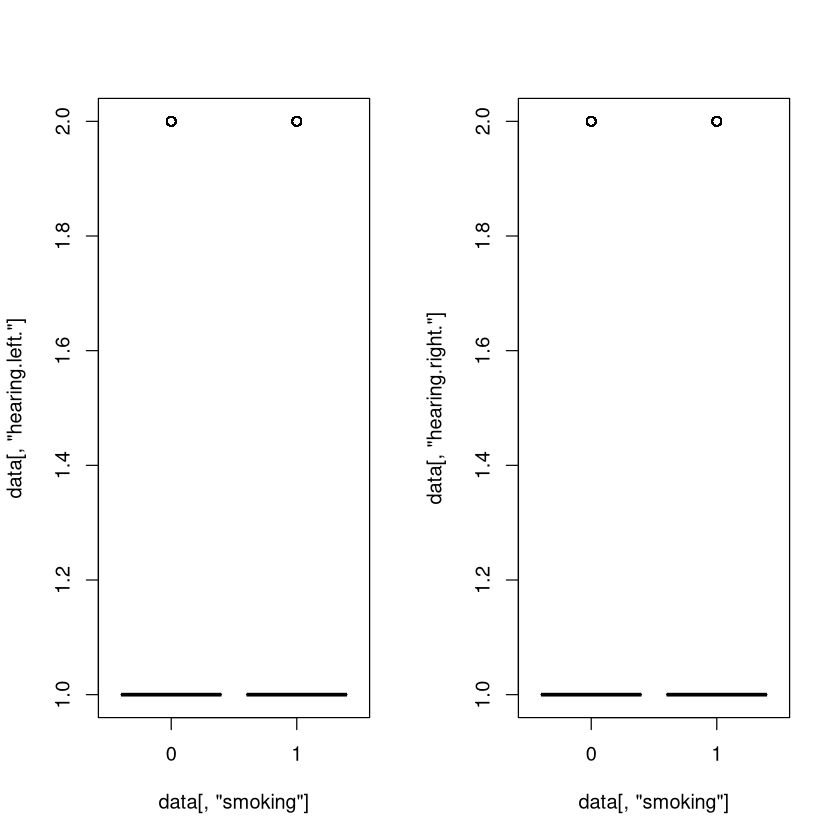

In [213]:
par(mfrow=c(1,2))
boxplot(data[,"hearing.left."] ~ data[,"smoking"])
boxplot(data[,"hearing.right."] ~ data[,"smoking"])

Without outliers.

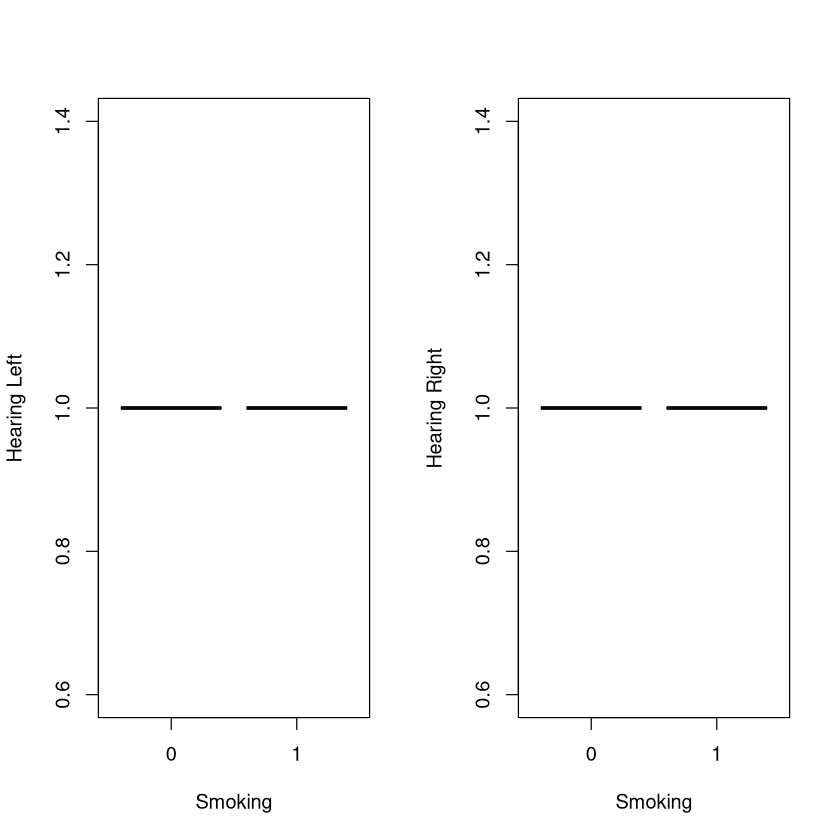

In [214]:
par(mfrow=c(1,2))
boxplot(data[,"hearing.left."] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Hearing Left")
boxplot(data[,"hearing.right."] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Hearing Right")

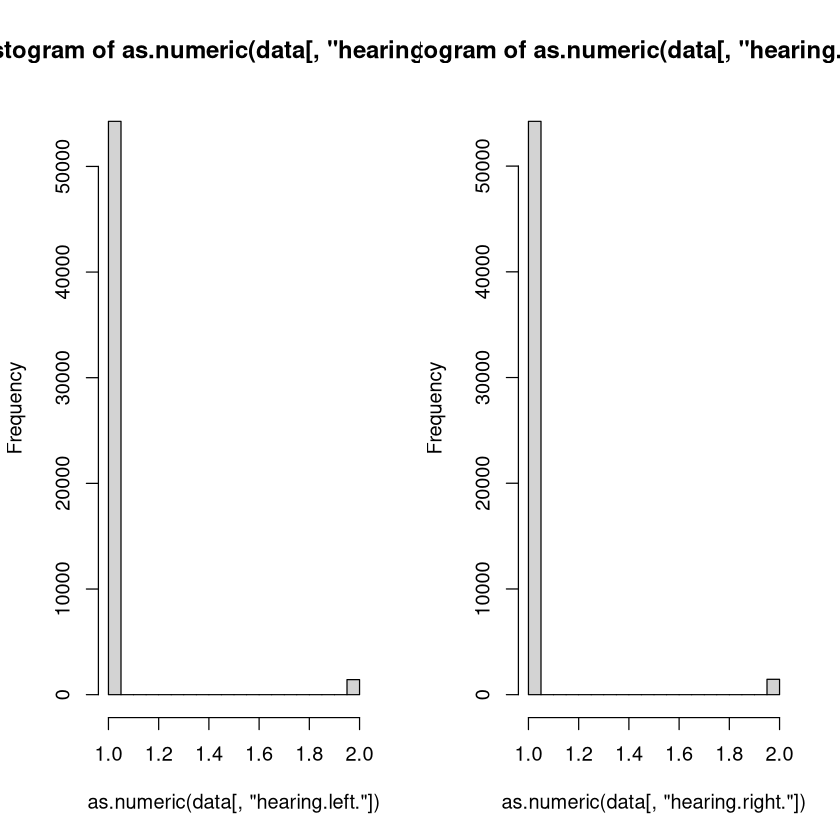

In [215]:
par(mfrow=c(1,2))
hist(as.numeric(data[,"hearing.left."]))
hist(as.numeric(data[,"hearing.right."]))

Contingency table:

In [216]:
round(table(data[,c("hearing.left.","smoking")])/summary(data[,"hearing.left."])*100)

             smoking
hearing.left.  0  1
            0 63 37
            1 70 30

In [217]:
round(table(data[,c("hearing.right.","smoking")])/summary(data[,"hearing.right."])*100)

              smoking
hearing.right.  0  1
             0 63 37
             1 69 31

#### Conclusion

No real difference on the target variable. Can be omitted for the machine learning model.

### Systolic variable

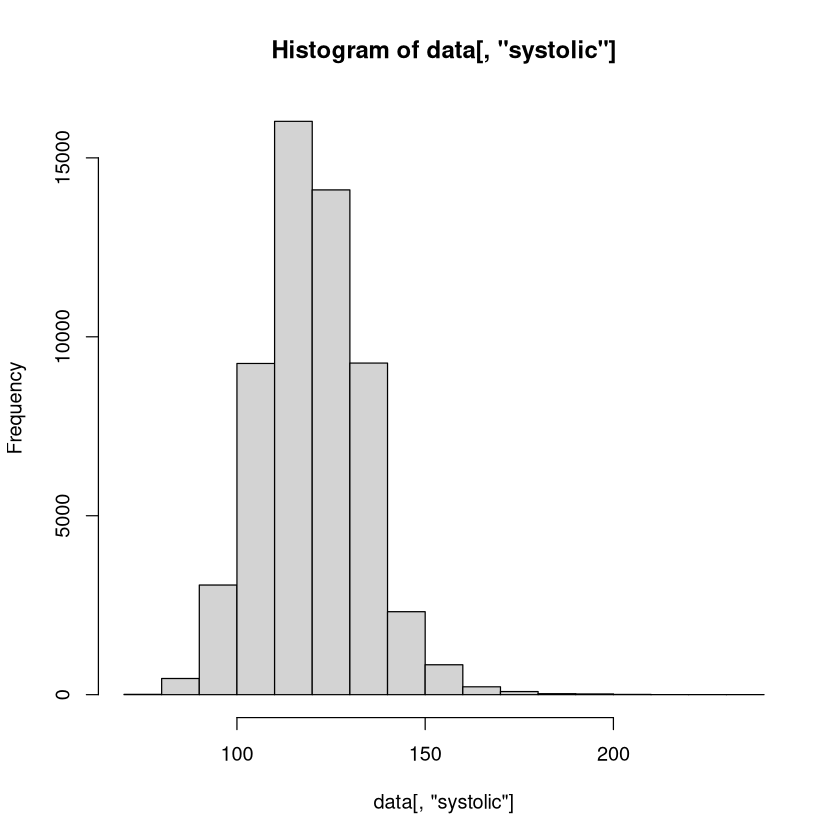

In [218]:
hist(data[,"systolic"])

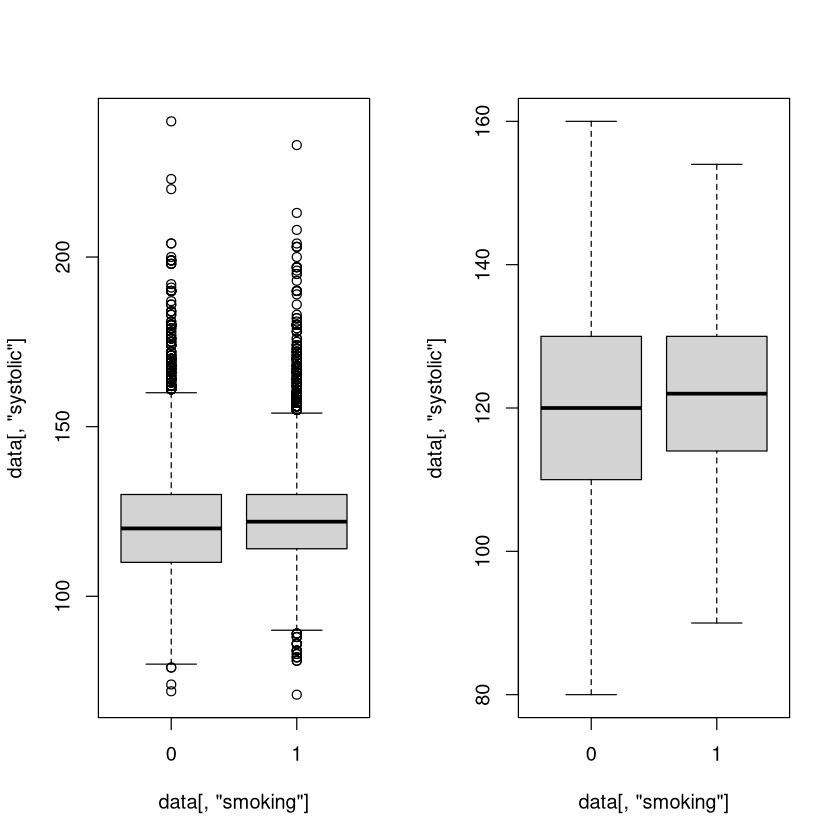

In [219]:
par(mfrow=c(1,2))
boxplot(data[,"systolic"] ~ data[,"smoking"])
boxplot(data[,"systolic"] ~ data[,"smoking"],outline=FALSE)

#### Conclusion

Small difference in the first quantile of data. Include in the dataset for the machine learning model.

In [220]:
model.data <- cbind(model.data, systolic=data[,"systolic"])

### Relaxation variable

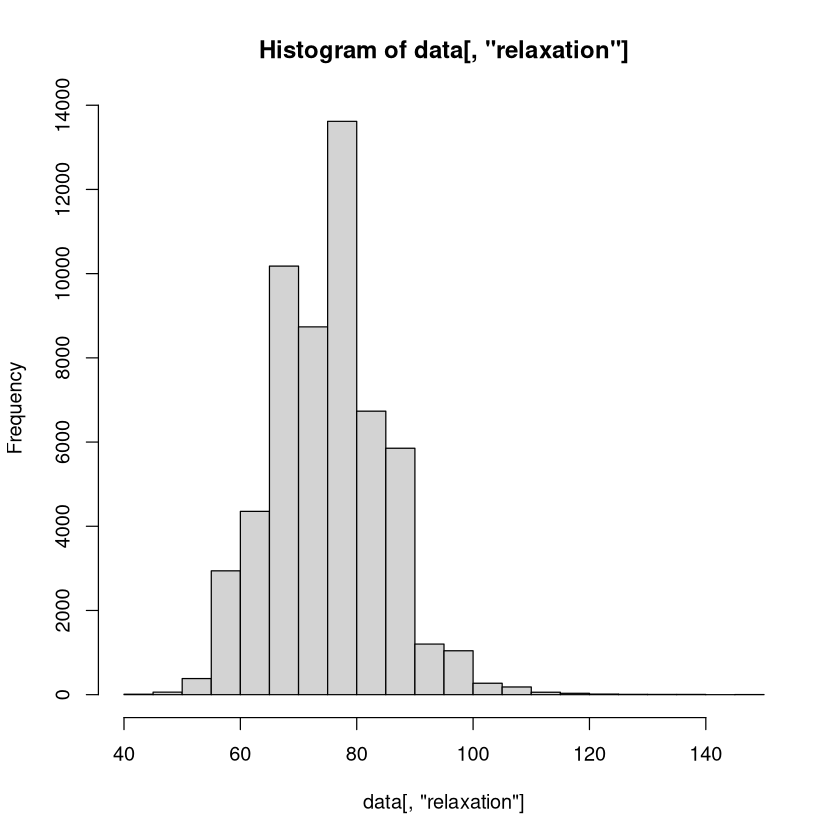

In [221]:
hist(data[,"relaxation"])

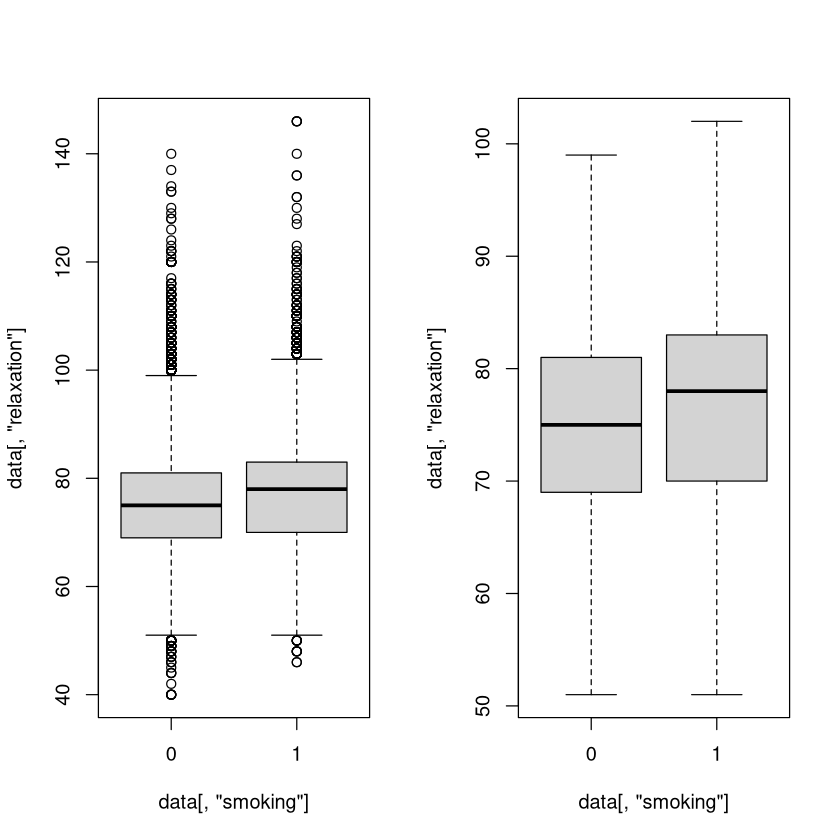

In [222]:
par(mfrow=c(1,2))
boxplot(data[,"relaxation"] ~ data[,"smoking"])
boxplot(data[,"relaxation"] ~ data[,"smoking"],outline=FALSE)

#### Conclusion

Small difference in the first mean of data. Include in the dataset for the machine learning model.

In [223]:
model.data <- cbind(model.data, relaxation=data[,"relaxation"])

### Fasting blood sugar variable

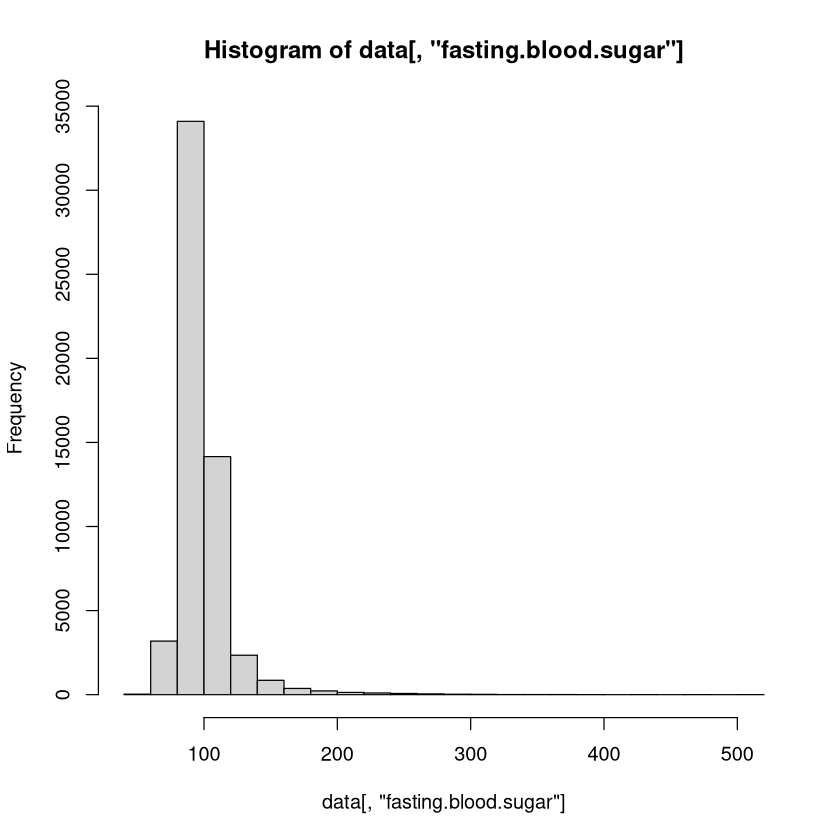

In [86]:
hist(data[,"fasting.blood.sugar"])

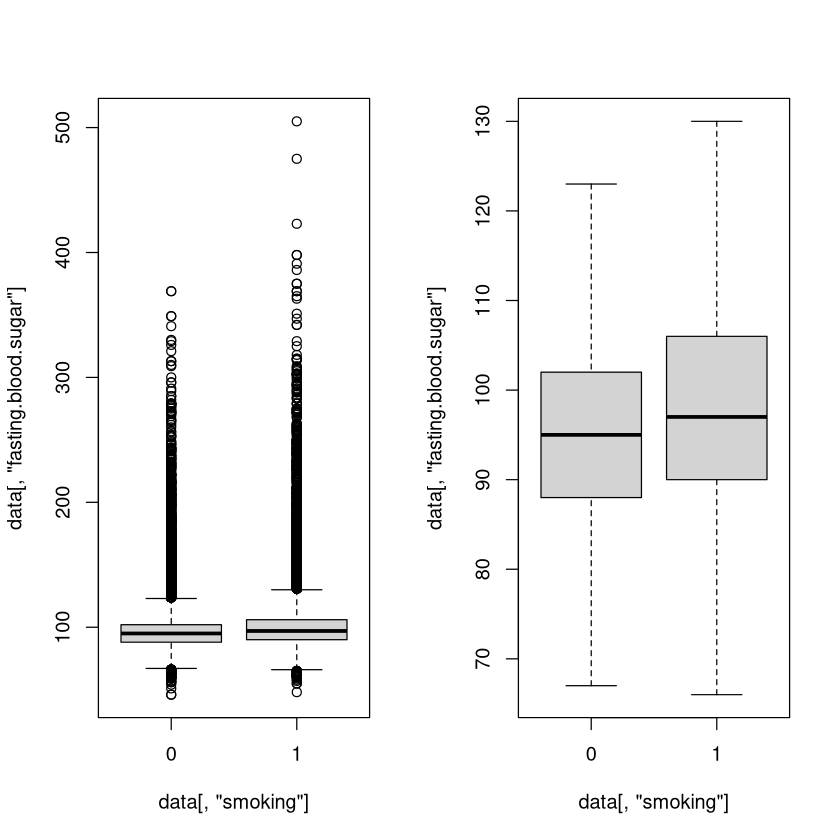

In [87]:
par(mfrow=c(1,2))
boxplot(data[,"fasting.blood.sugar"] ~ data[,"smoking"])
boxplot(data[,"fasting.blood.sugar"] ~ data[,"smoking"],outline=FALSE)

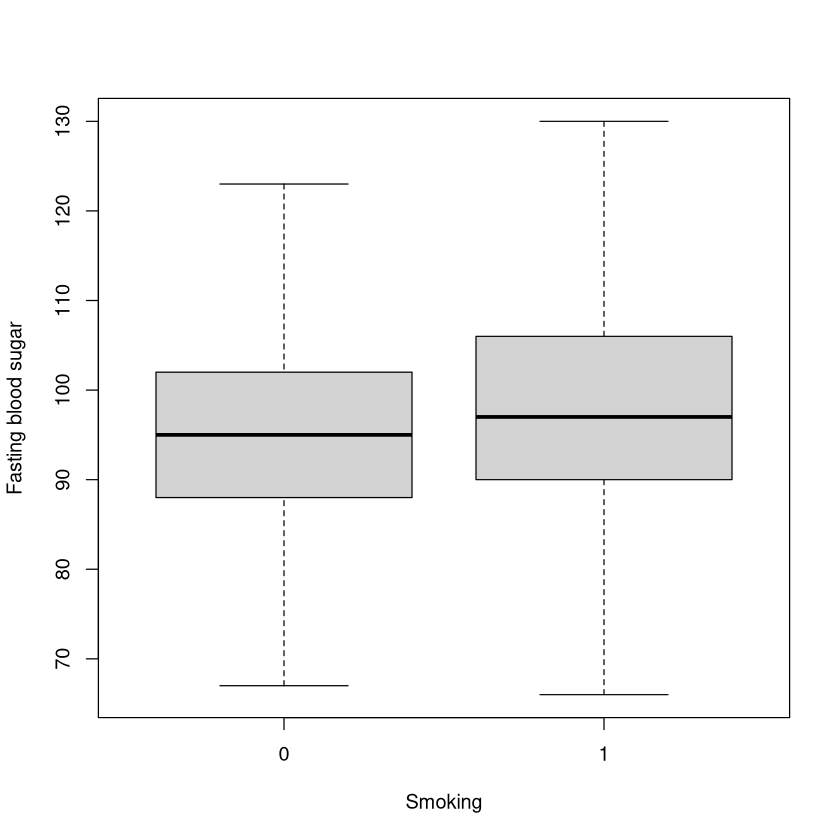

In [227]:
boxplot(data[,"fasting.blood.sugar"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Fasting blood sugar")

#### Conclusion

Very small difference in all quantiles. Include in the dataset for the machine learning model.

In [88]:
model.data <- cbind(model.data, fasting.blood.sugar=data[,"fasting.blood.sugar"])

### Cholesterol variable

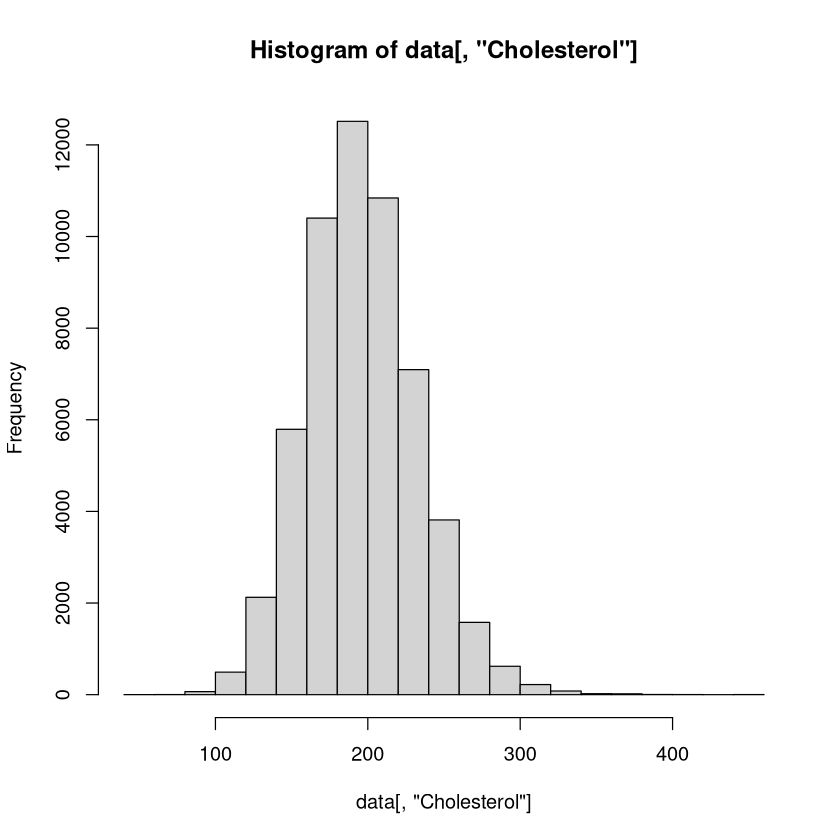

In [89]:
hist(data[,"Cholesterol"])

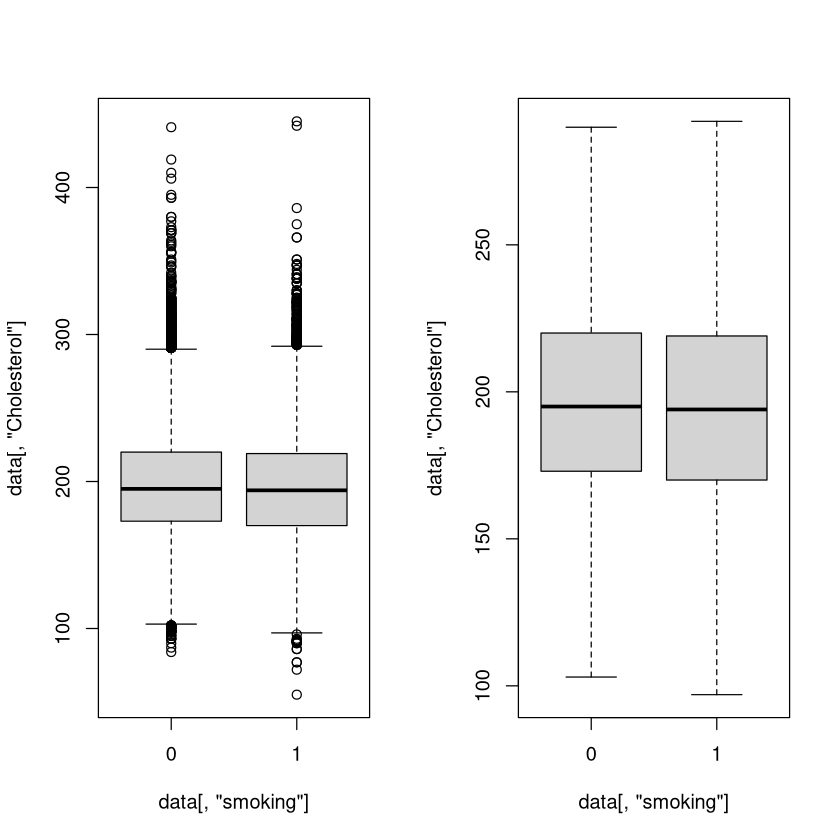

In [90]:
par(mfrow=c(1,2))
boxplot(data[,"Cholesterol"] ~ data[,"smoking"])
boxplot(data[,"Cholesterol"] ~ data[,"smoking"],outline=FALSE)

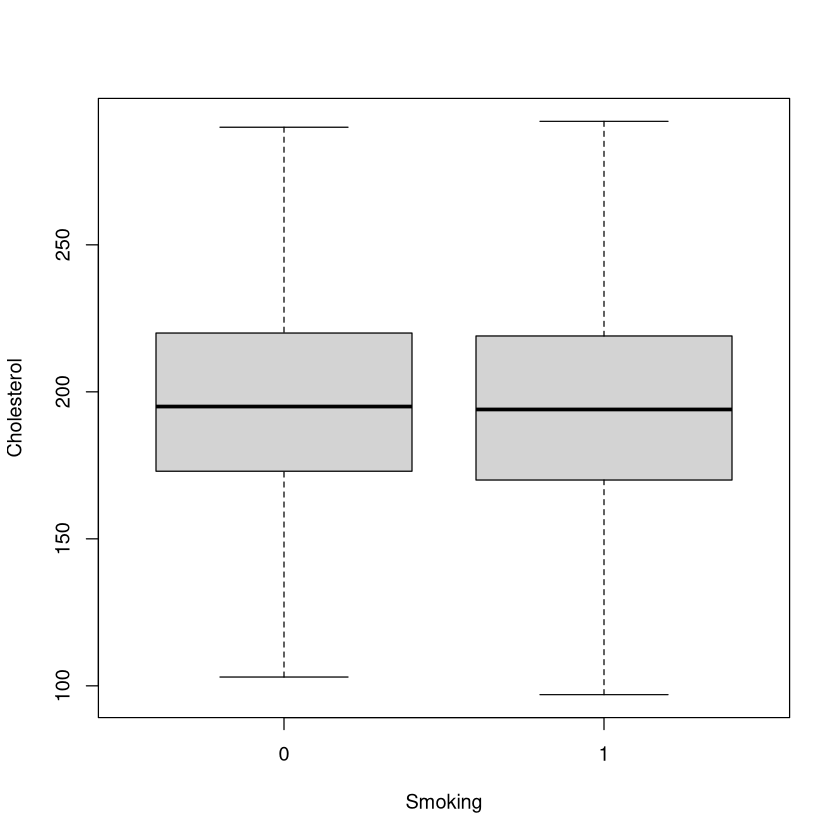

In [138]:
boxplot(data[,"Cholesterol"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Cholesterol")

#### Conclusion

Don't include in the machine learning model.

### Triglyceride variable

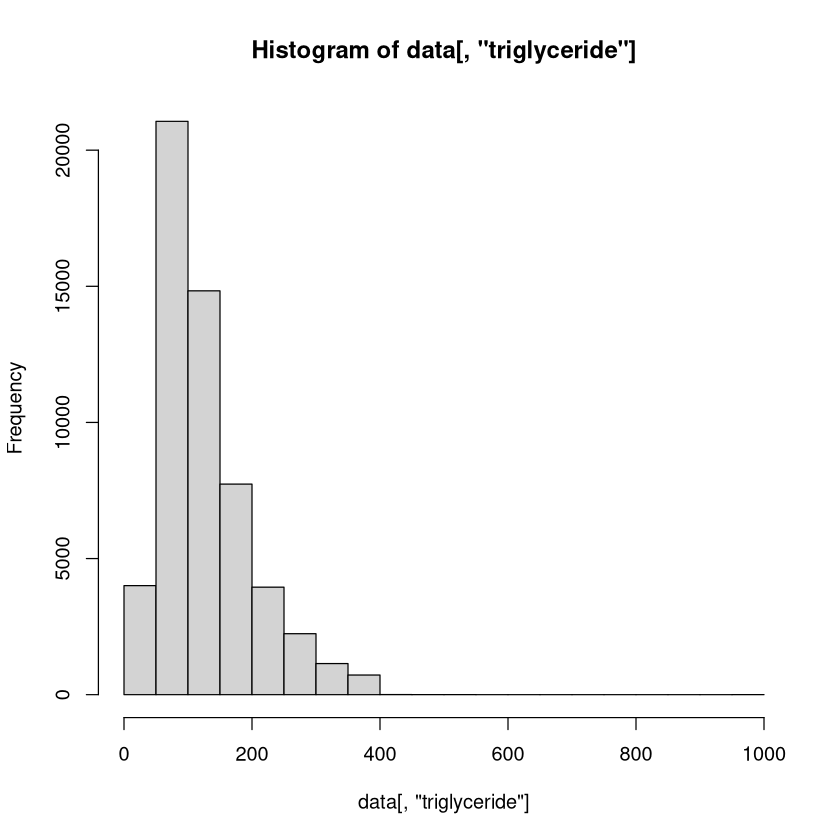

In [91]:
hist(data[,"triglyceride"])

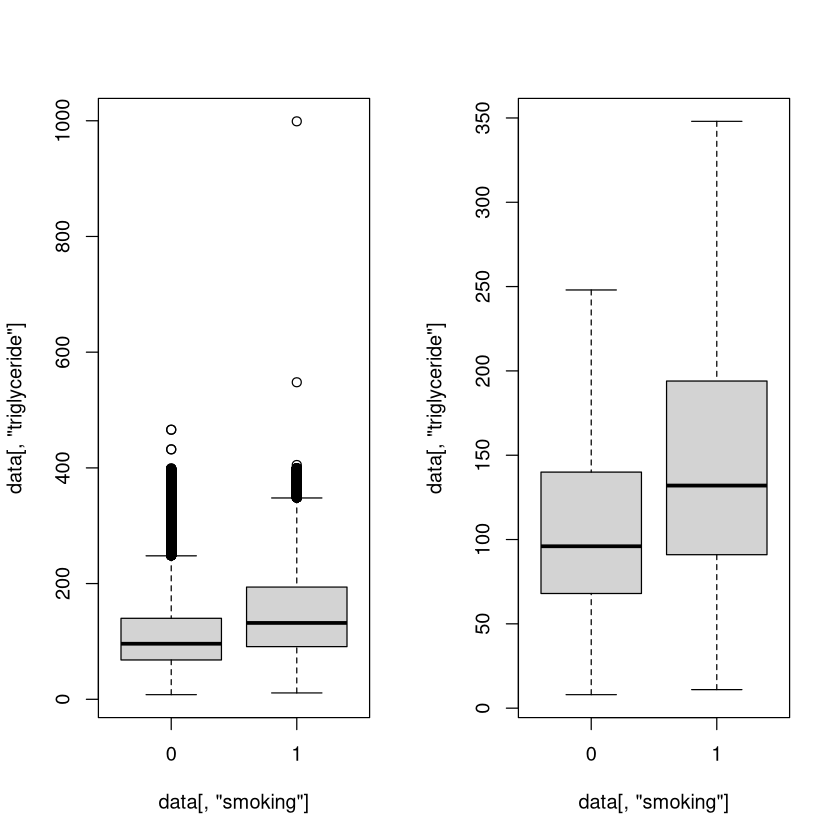

In [92]:
par(mfrow=c(1,2))
boxplot(data[,"triglyceride"] ~ data[,"smoking"])
boxplot(data[,"triglyceride"] ~ data[,"smoking"],outline=FALSE)

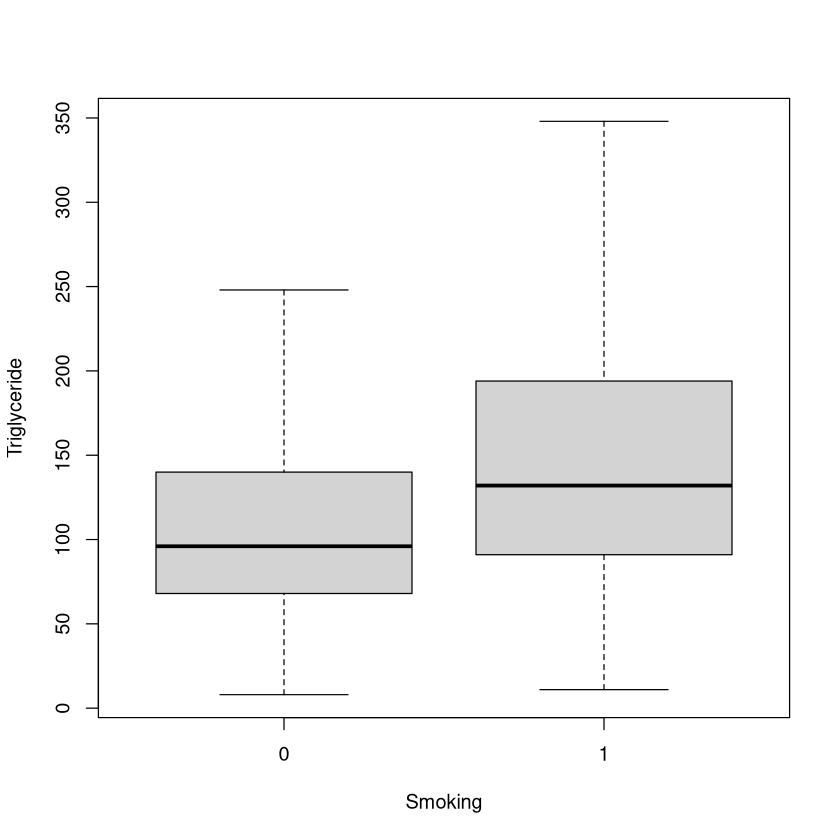

In [228]:
boxplot(data[,"triglyceride"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Triglyceride")

#### Conclusion

Include in the machine learning model.

In [93]:
model.data <- cbind(model.data, triglyceride=data["triglyceride"])

### HDL

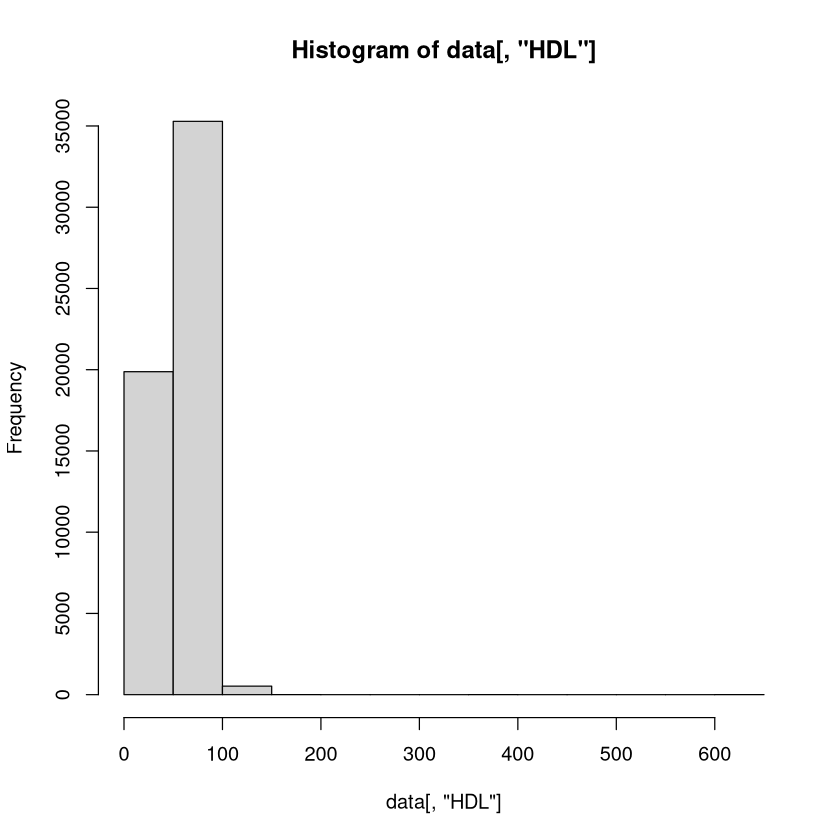

In [94]:
hist(data[,"HDL"])

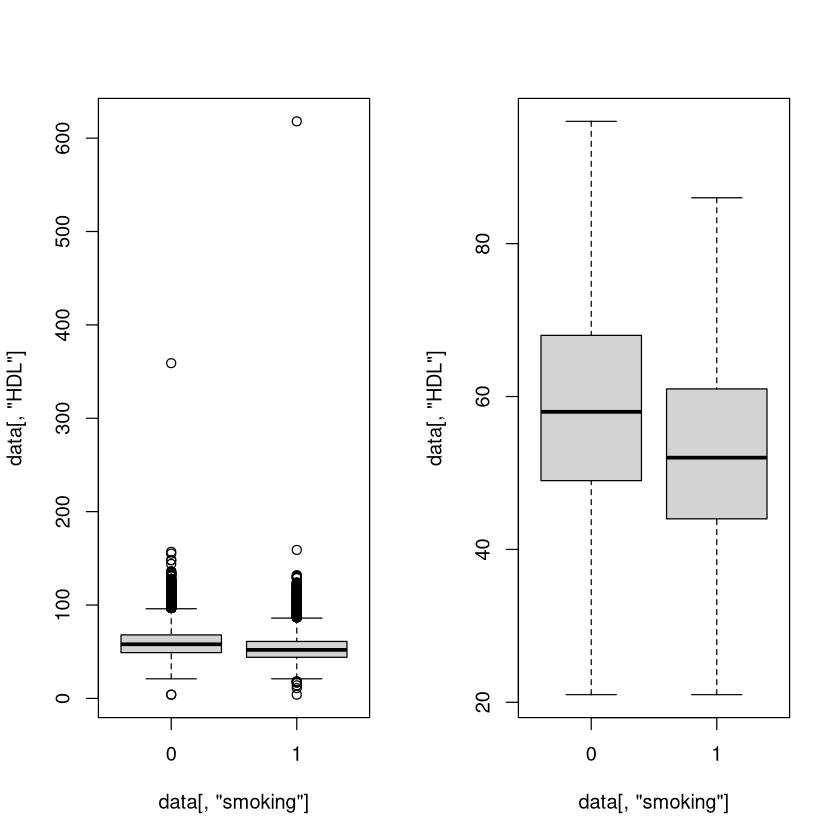

In [95]:
par(mfrow=c(1,2))
boxplot(data[,"HDL"] ~ data[,"smoking"])
boxplot(data[,"HDL"] ~ data[,"smoking"],outline=FALSE)

#### Conclusion

Inlcude in the machine learning model.

In [96]:
model.data <- cbind(model.data, HDL=data["HDL"])

### LDL variable

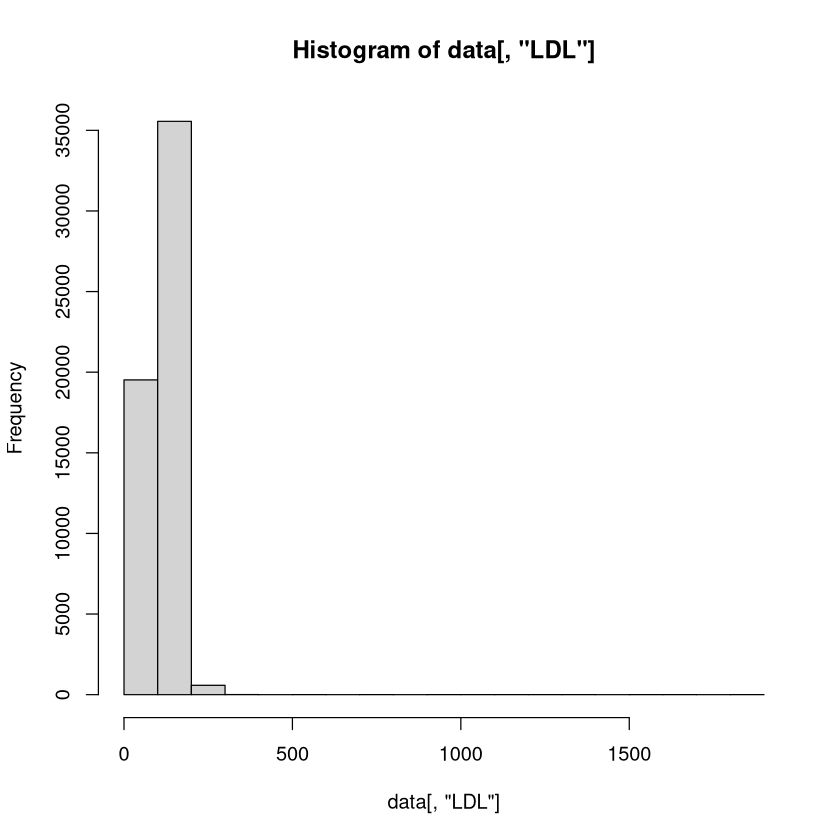

In [97]:
hist(data[,"LDL"])

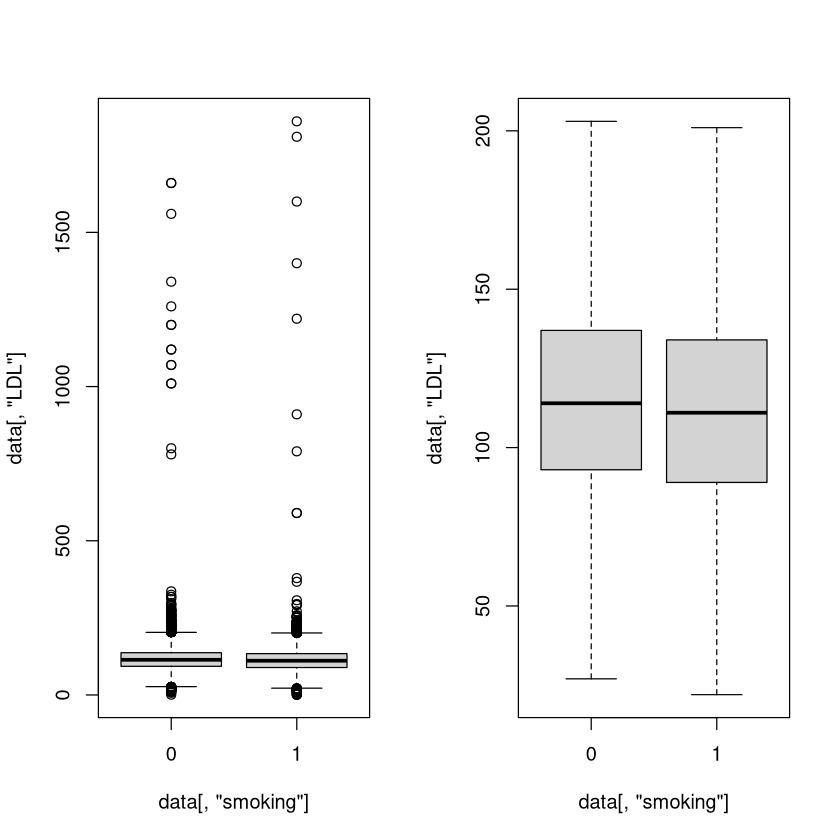

In [98]:
par(mfrow=c(1,2))
boxplot(data[,"LDL"] ~ data[,"smoking"])
boxplot(data[,"LDL"] ~ data[,"smoking"],outline=FALSE)

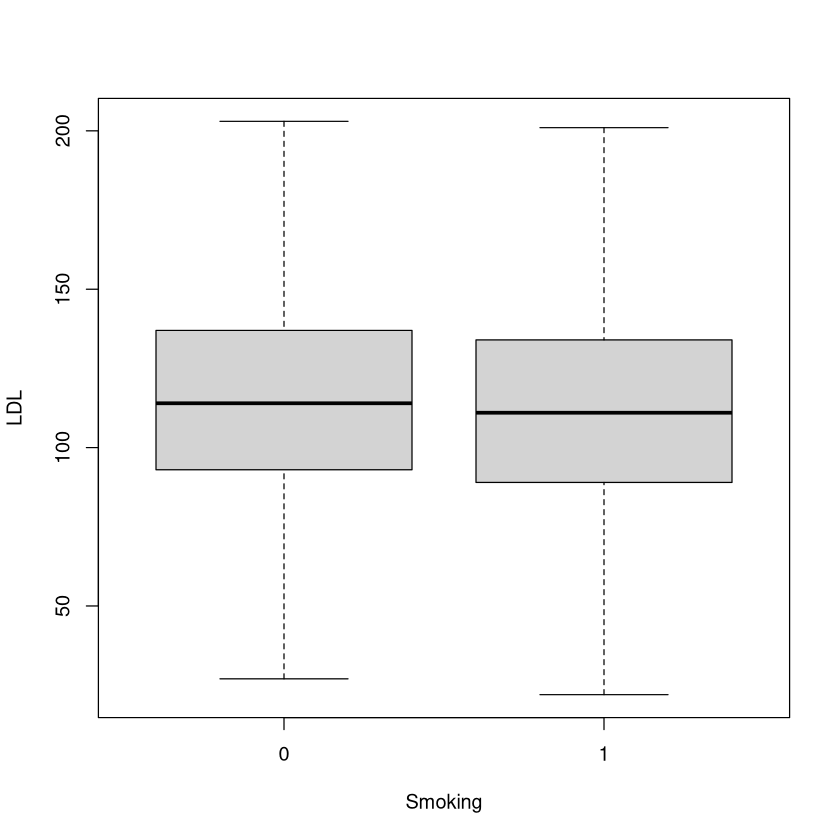

In [139]:
boxplot(data[,"LDL"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="LDL")

#### Conclusion

Don't include in the machine learning model.

### Hemoglobin variable

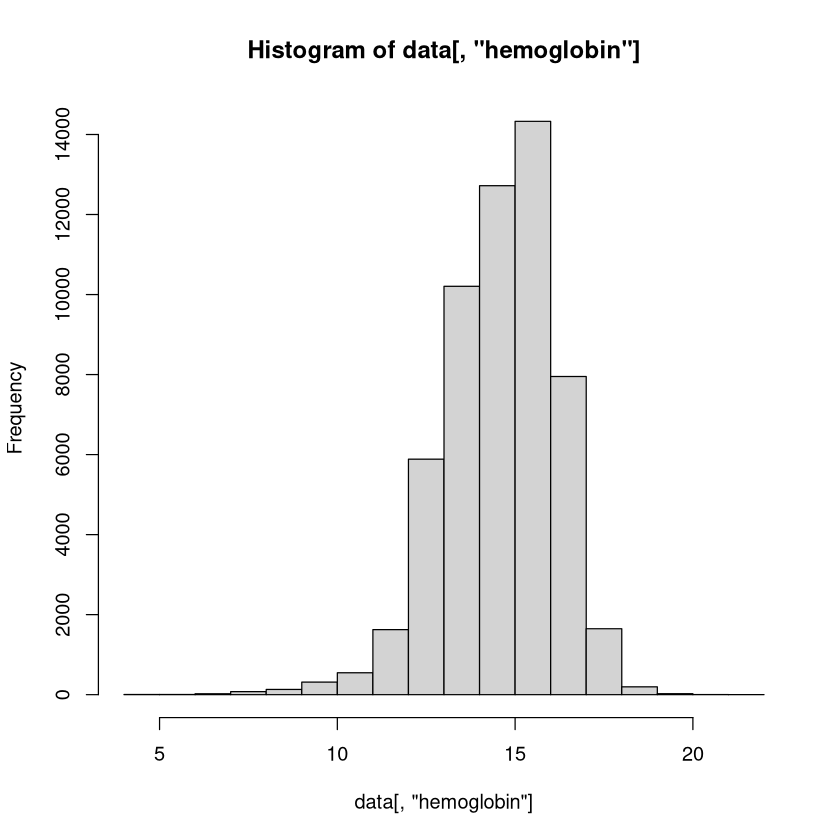

In [99]:
hist(data[,"hemoglobin"])

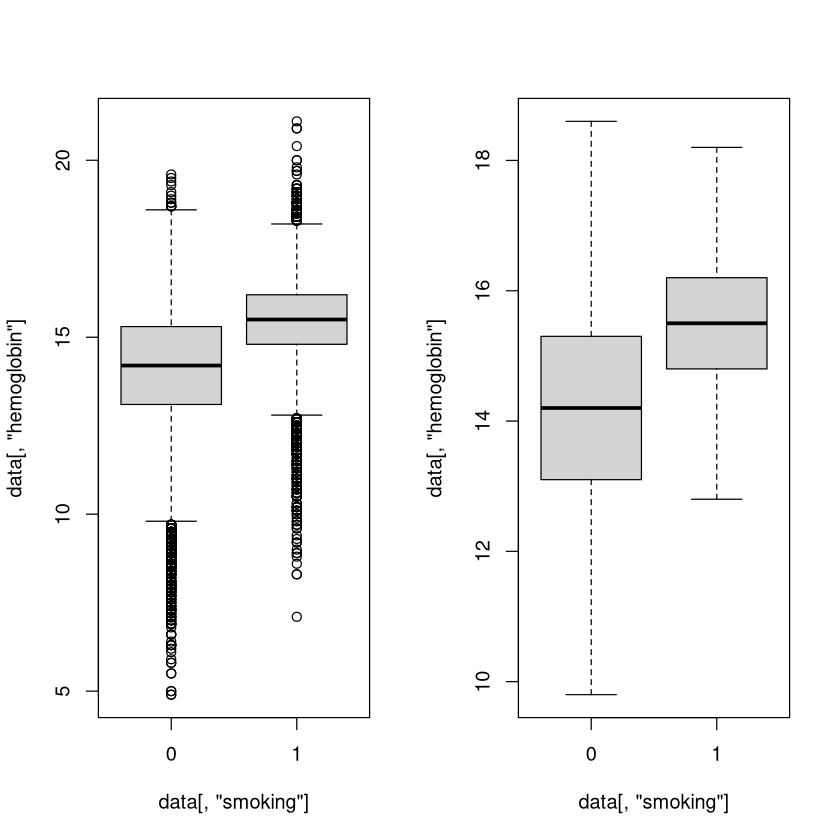

In [100]:
par(mfrow=c(1,2))
boxplot(data[,"hemoglobin"] ~ data[,"smoking"])
boxplot(data[,"hemoglobin"] ~ data[,"smoking"],outline=FALSE)

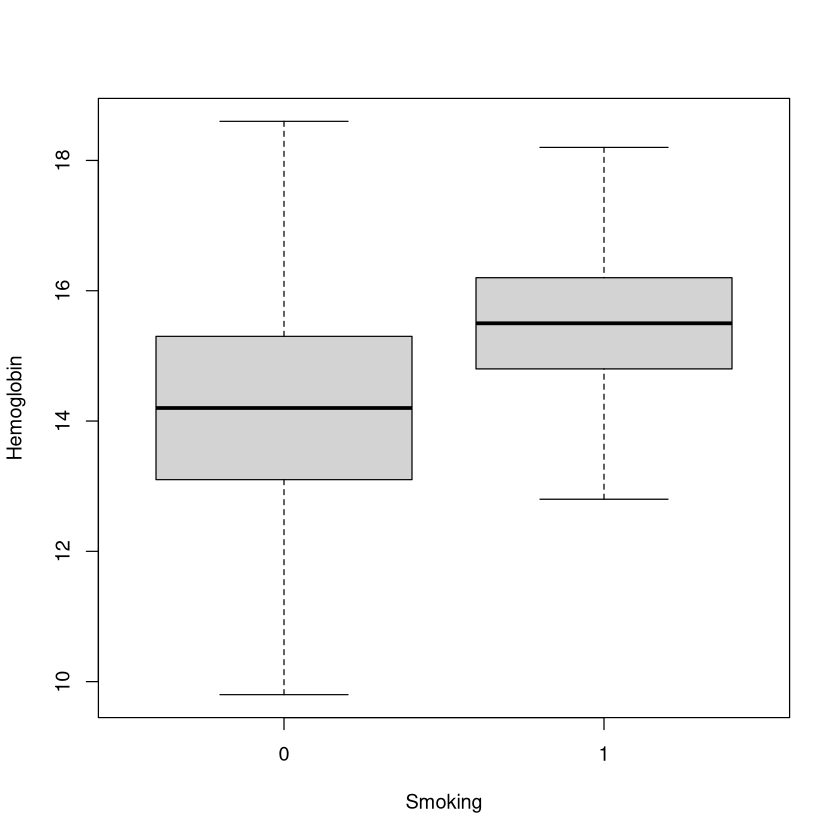

In [229]:
boxplot(data[,"hemoglobin"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Hemoglobin")

#### Conclusion

Include in machine learning model.

In [101]:
model.data <- cbind(model.data, hemoglobin=data["hemoglobin"])

### Urine protein

In [102]:
unique(data[,"Urine.protein"])

[1] 1 3 2 4 5 6

Convert as a categorical variable.

In [103]:
data[,"Urine.protein"] <- as.factor(data[,"Urine.protein"])

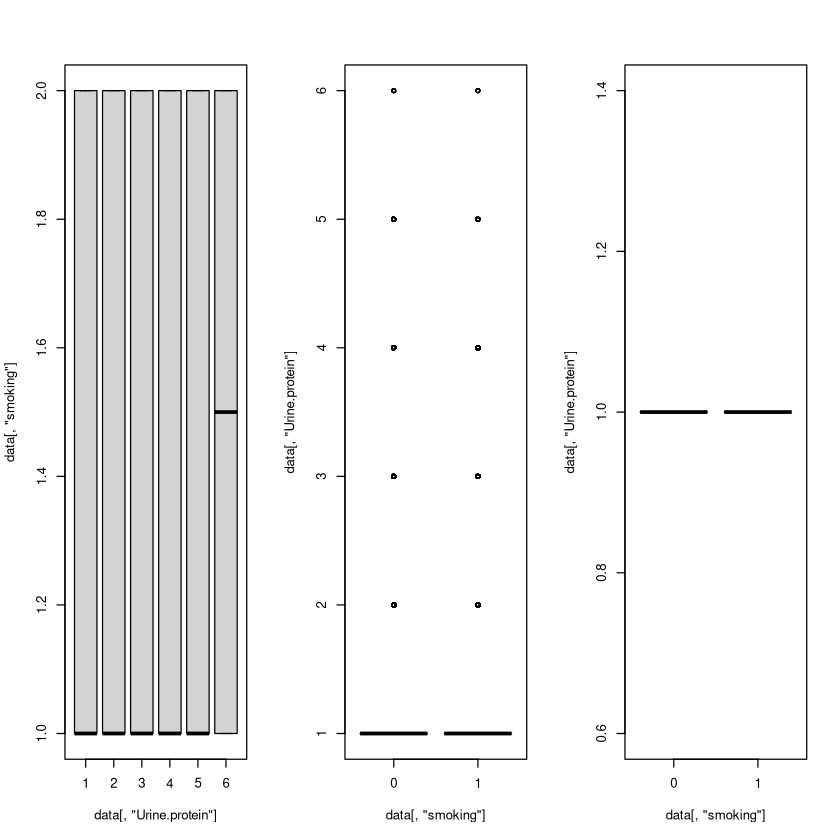

In [104]:
par(mfrow=c(1,3))
boxplot(data[,"smoking"] ~ data[,"Urine.protein"])
boxplot(data[,"Urine.protein"] ~ data[,"smoking"])
boxplot(data[,"Urine.protein"] ~ data[,"smoking"],outline=FALSE)

Contingency boards:

In [105]:
round(table(data[,c("Urine.protein","smoking")])/summary(data[,"Urine.protein"])*100)

             smoking
Urine.protein  0  1
            1 63 37
            2 63 37
            3 60 40
            4 55 45
            5 59 41
            6 50 50

In [140]:
subset(data,data[,"Urine.protein"]==6)

,gender,age,height.cm.,weight.kg.,waist.cm.,eyesight.left.,eyesight.right.,hearing.left.,hearing.right.,systolic,⋯,hemoglobin,Urine.protein,serum.creatinine,AST,ALT,Gtp,oral,dental.caries,tartar,smoking
,<fct>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>
5805,F,40,160,55,74.0,1.5,1.5,0,0,107,⋯,12.6,6,0.7,18,15,23,Y,1,Y,0
8441,F,40,155,60,87.0,1.2,0.8,0,0,111,⋯,12.1,6,0.8,23,20,38,Y,0,Y,1
11670,F,55,150,45,60.1,9.9,1,0,0,122,⋯,13.6,6,1.1,35,21,19,Y,0,Y,0
15292,M,45,175,75,85.0,1.2,1,0,0,163,⋯,16.9,6,1,45,73,110,Y,0,Y,1
16237,M,25,175,70,78.0,1,0.8,0,0,115,⋯,16.9,6,1.4,23,21,31,Y,1,N,1
25940,M,35,180,90,93.8,1.2,1,0,0,124,⋯,16.0,6,1,32,19,22,Y,1,Y,1
30140,F,45,155,70,92.0,1.2,0.9,0,0,139,⋯,12.2,6,0.6,16,14,17,Y,0,N,0
41661,M,60,160,55,76.2,0.7,0.7,0,0,134,⋯,12.9,6,0.7,41,34,179,Y,0,Y,1
43722,M,35,170,65,77.0,0.6,0.8,0,0,124,⋯,15.9,6,1.1,23,30,17,Y,0,Y,0


#### Conclusion

Don't include in machine learning model.

### Serum creatinine variable

In [106]:
sort(unique(data[,"serum.creatinine"]))

[1]  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0  1.1  1.2  1.3  1.4  1.5
[16]  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.5  2.6  3.0  3.2  3.3  3.4  5.0
[31]  5.9  6.4  7.4  7.5  9.9 10.0 10.3 11.6

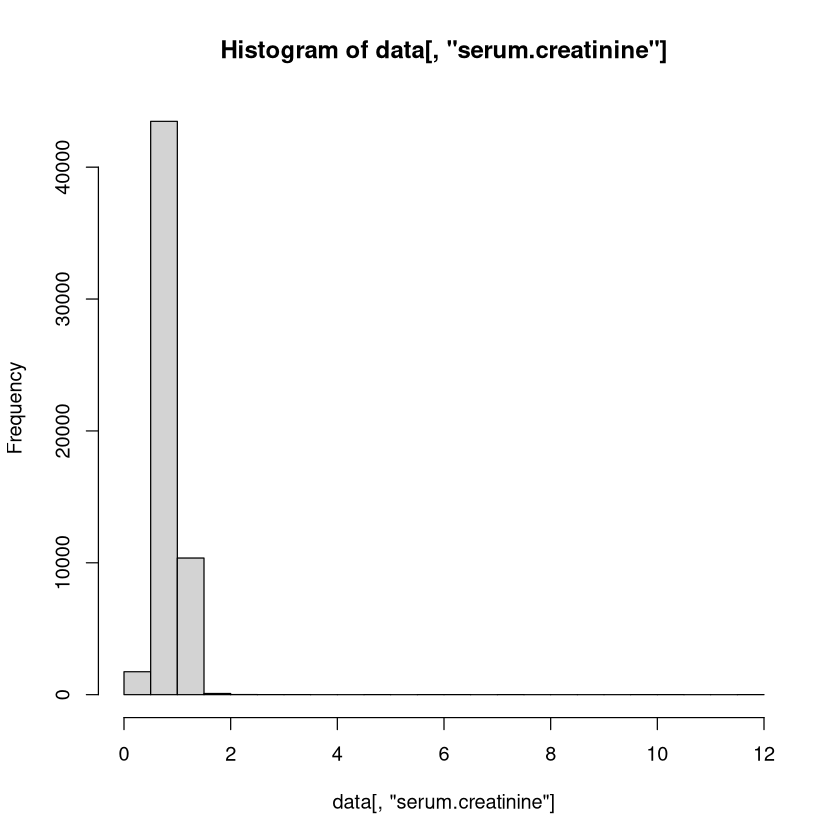

In [107]:
hist(data[,"serum.creatinine"])

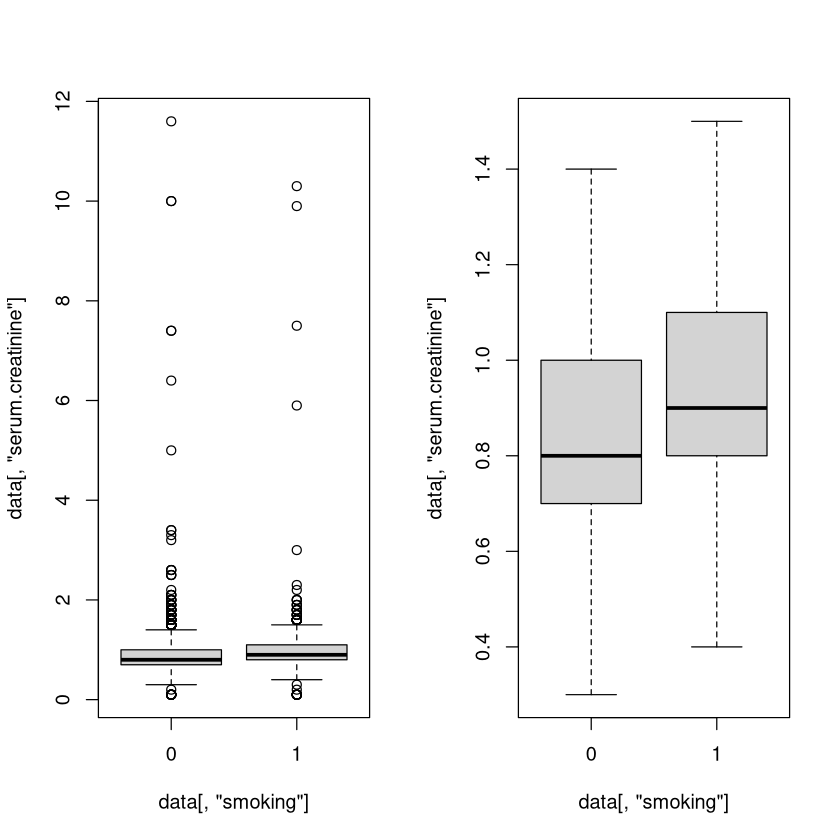

In [108]:
par(mfrow=c(1,2))
boxplot(data[,"serum.creatinine"] ~ data[,"smoking"])
boxplot(data[,"serum.creatinine"] ~ data[,"smoking"],outline=FALSE)

Convert to categorical variable.

In [109]:
data[,"serum.creatinine"] <- as.factor(data[,"serum.creatinine"])

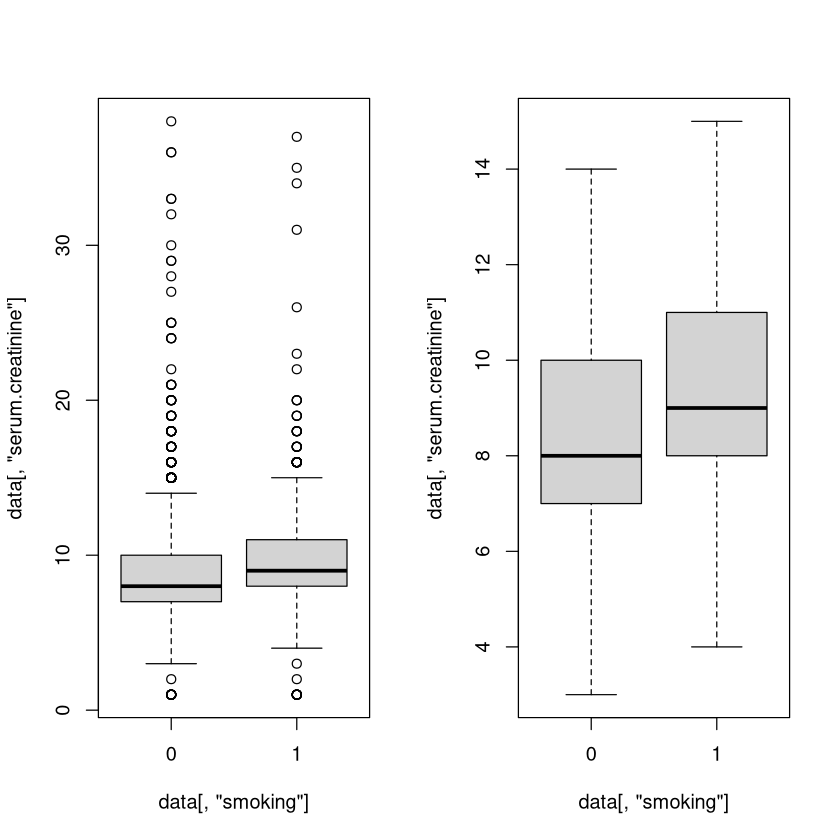

In [110]:
par(mfrow=c(1,2))
boxplot(data[,"serum.creatinine"] ~ data[,"smoking"])
boxplot(data[,"serum.creatinine"] ~ data[,"smoking"],outline=FALSE)

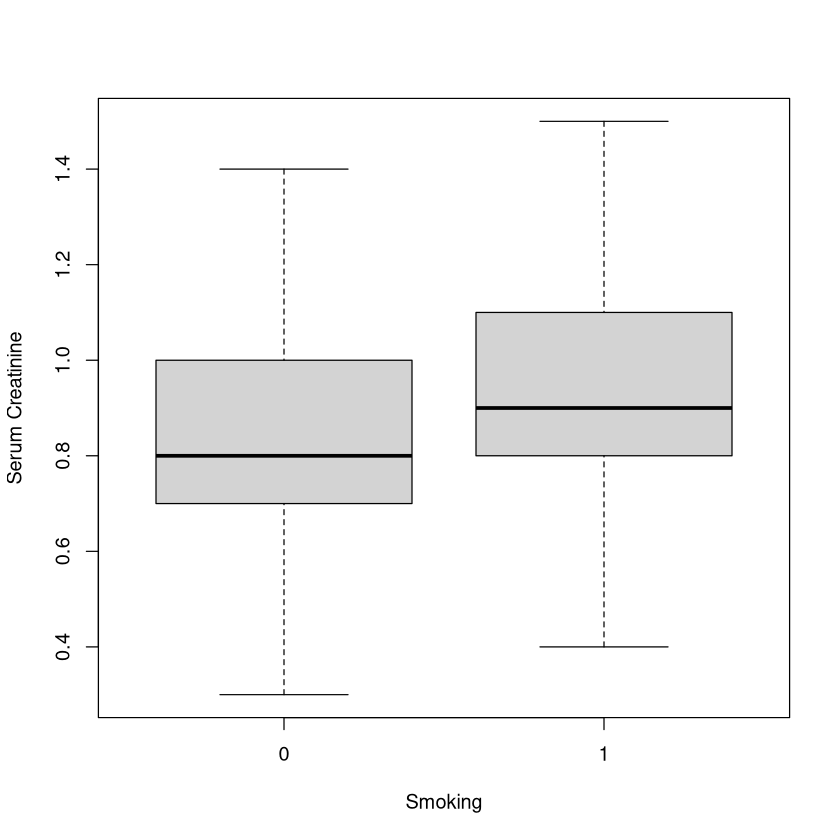

In [230]:
boxplot(data[,"serum.creatinine"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Serum Creatinine")

#### Conclusion

Include in machine learning model.

In [111]:
model.data <- cbind(model.data, serum.creatinine=data[,"serum.creatinine"])

### AST & ALT variable

ALT & AST:

Serum AST level, serum ALT (alanine transaminase) level, and their ratio (AST/ALT ratio) are commonly measured clinically as biomarkers for liver health.

[Source](https://en.wikipedia.org/wiki/Aspartate_transaminase)

ALT & AST variable are dependent on each other -> Include only one in the machine learning model. 

#### AST variable

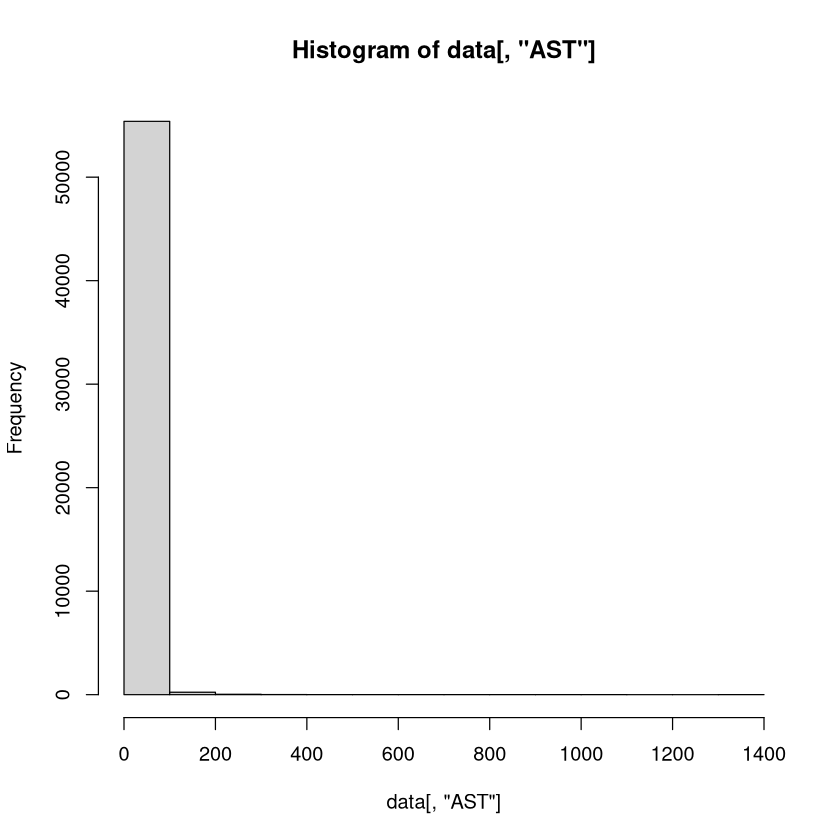

In [112]:
hist(data[,"AST"])

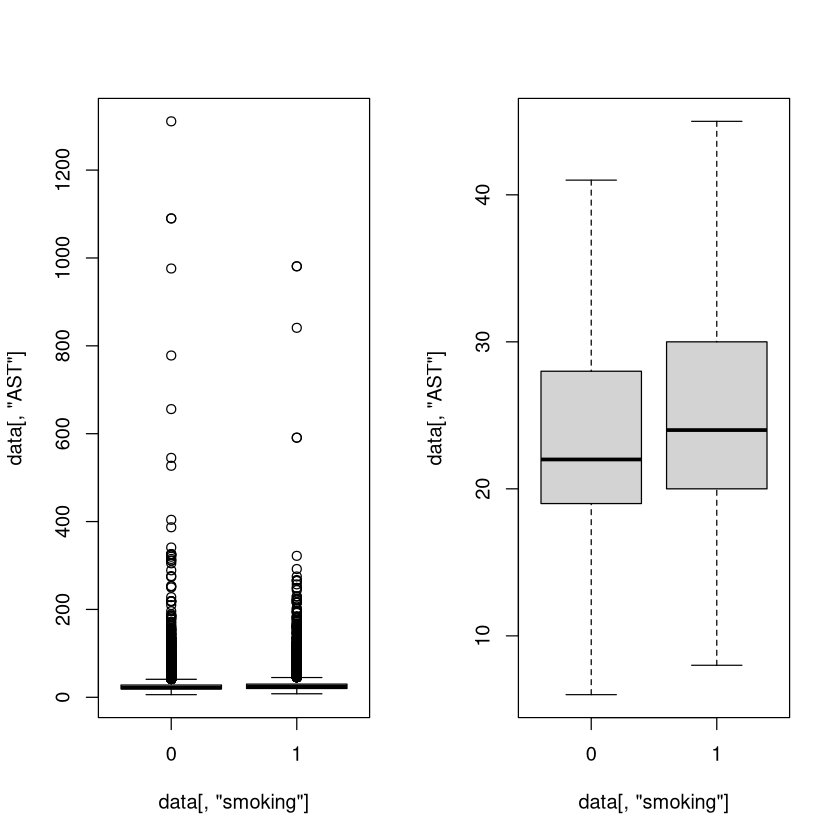

In [113]:
par(mfrow=c(1,2))
boxplot(data[,"AST"] ~ data[,"smoking"])
boxplot(data[,"AST"] ~ data[,"smoking"],outline=FALSE)

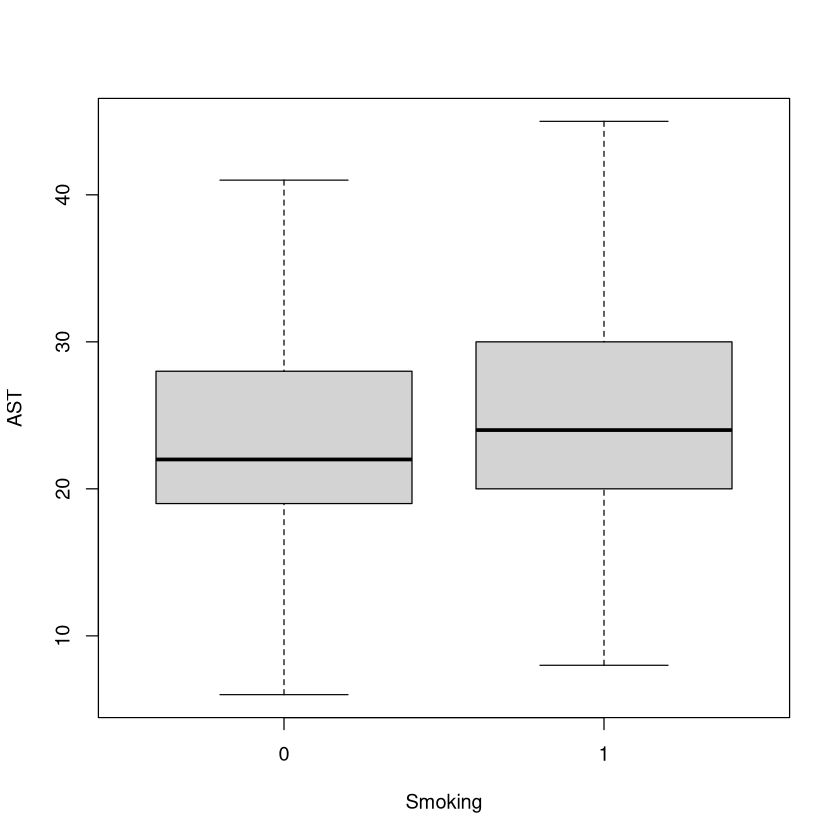

In [142]:
boxplot(data[,"AST"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="AST")

#### ALT variable

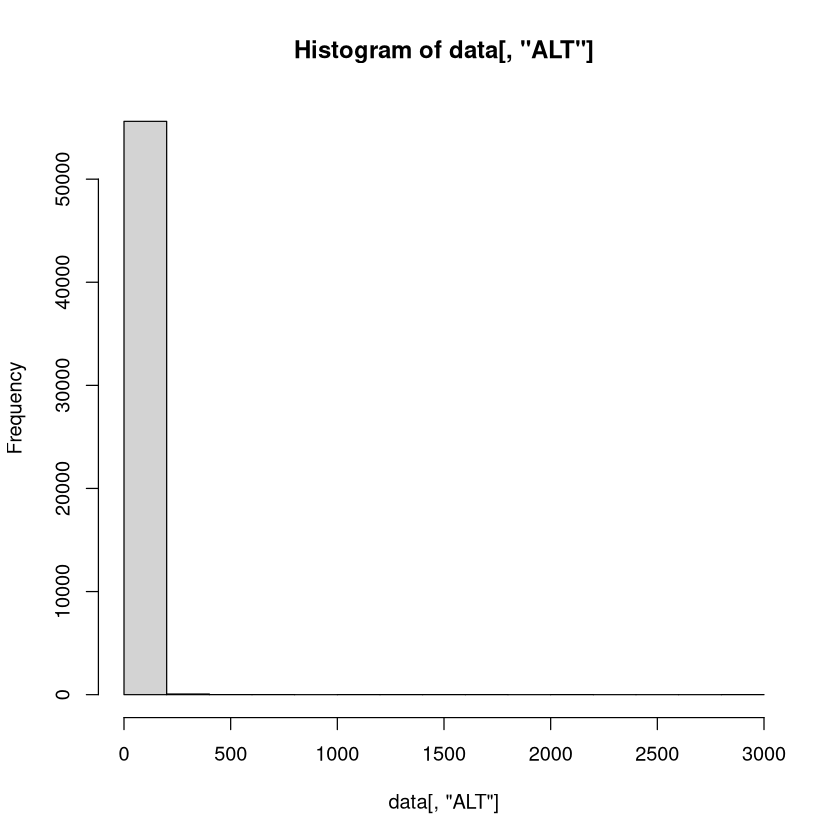

In [114]:
hist(data[,"ALT"])

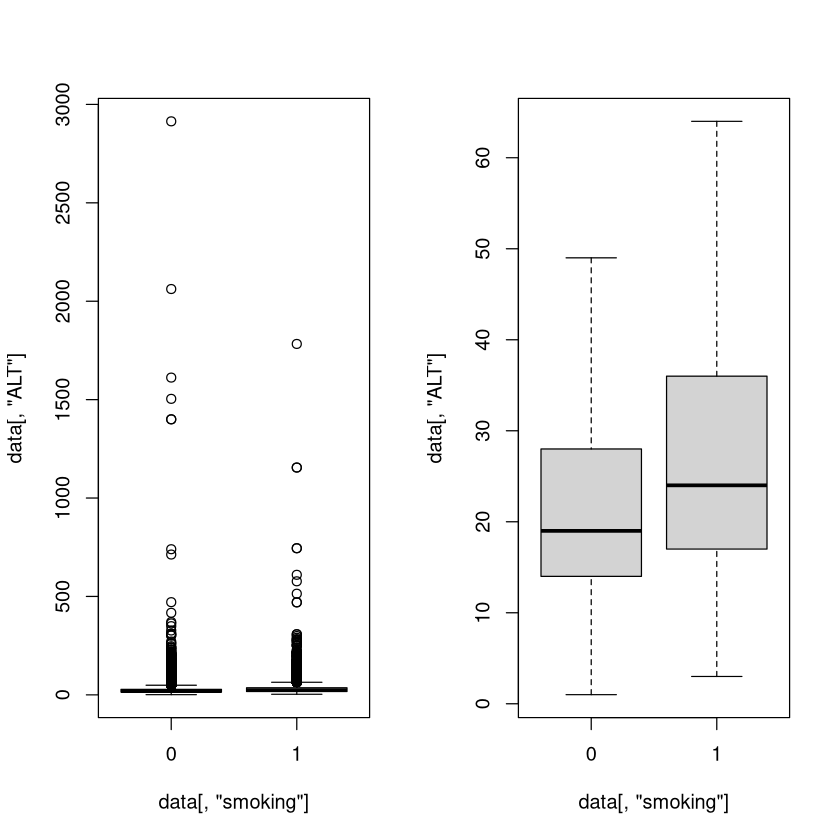

In [115]:
par(mfrow=c(1,2))
boxplot(data[,"ALT"] ~ data[,"smoking"])
boxplot(data[,"ALT"] ~ data[,"smoking"],outline=FALSE)

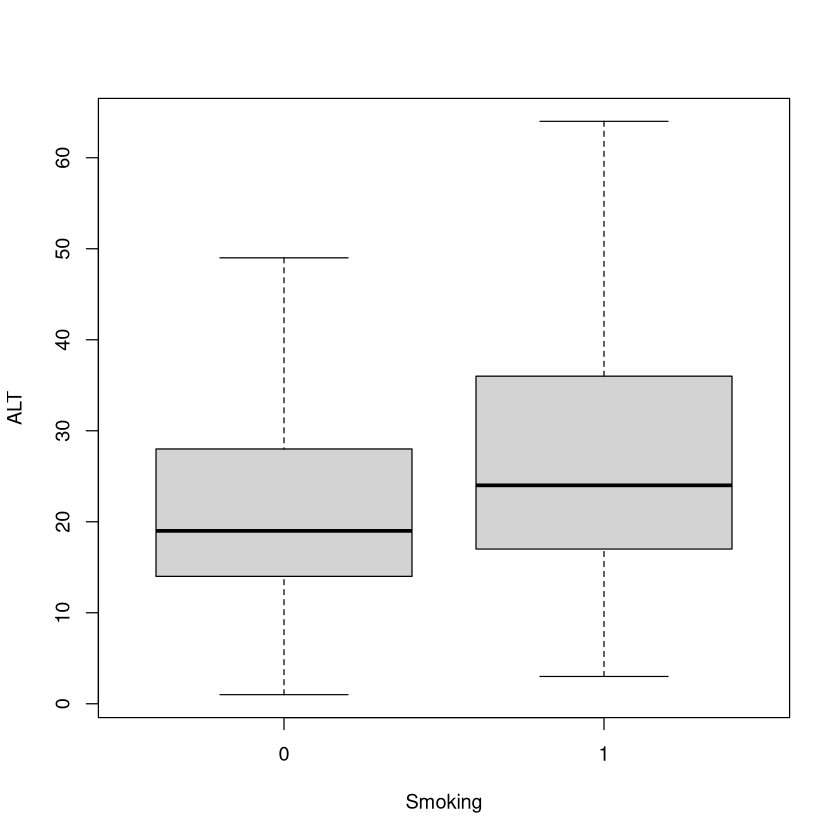

In [231]:
boxplot(data[,"ALT"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="ALT")

#### Conclusion

The influence of the ALT variable on the target variable is greater. Add this one to the machine learning model.

In [116]:
model.data <- cbind(model.data, ALT=data["ALT"])

### Gtp variable

In [145]:
data[0:10,"Gtp"]

[1]  27  18  22  18  22  33  39 111  14  63

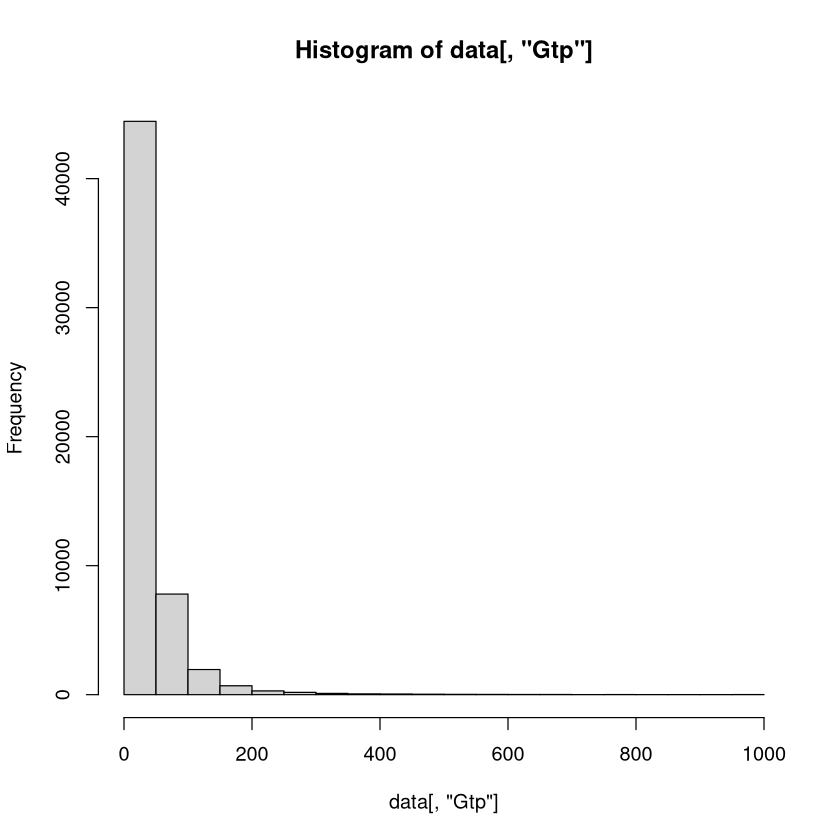

In [117]:
hist(data[,"Gtp"])

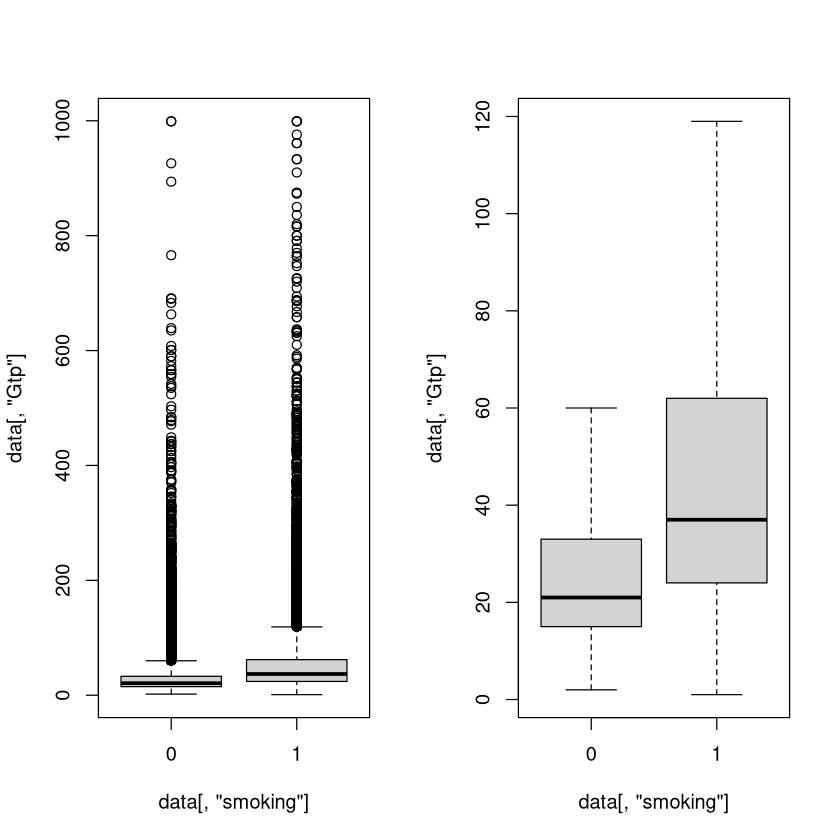

In [118]:
par(mfrow=c(1,2))
boxplot(data[,"Gtp"] ~ data[,"smoking"])
boxplot(data[,"Gtp"] ~ data[,"smoking"],outline=FALSE)

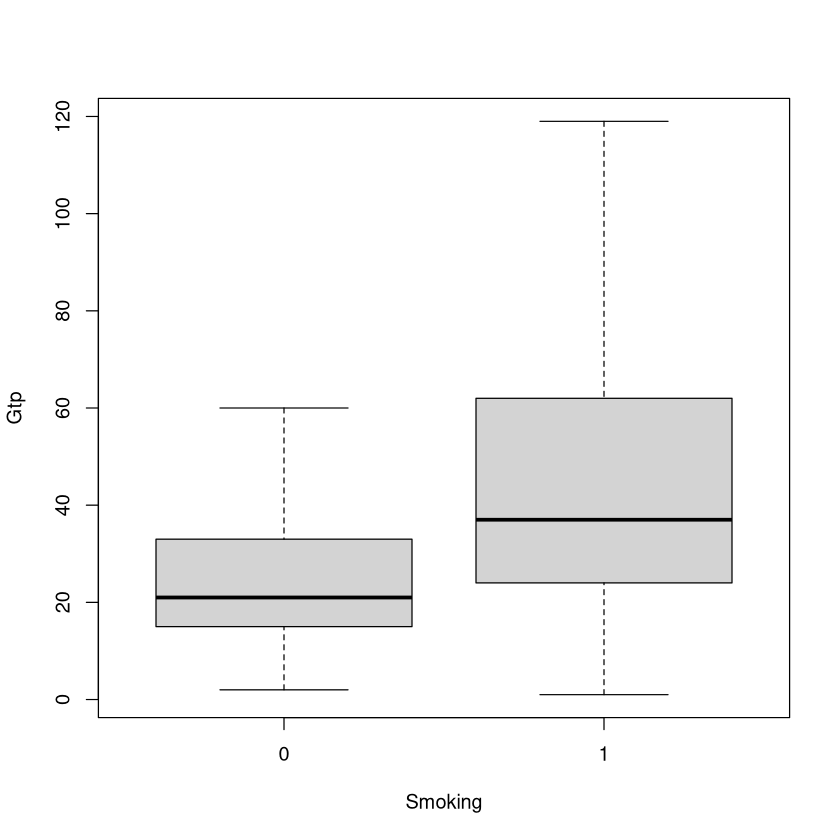

In [232]:
boxplot(data[,"Gtp"] ~ data[,"smoking"],outline=FALSE,xlab="Smoking",ylab="Gtp")

#### Conclusion

Include in machine learning model.

In [119]:
model.data <- cbind(model.data, Gtp=data["Gtp"])

### Oral variable

Can be removed in the machine learning model. Only one value over the whole dataset.

### Dental caries variable

In [121]:
unique(data[,"dental.caries"])

[1] 0 1

In [157]:
data[,"dental.caries"] <- as.factor(data[,"dental.caries"])

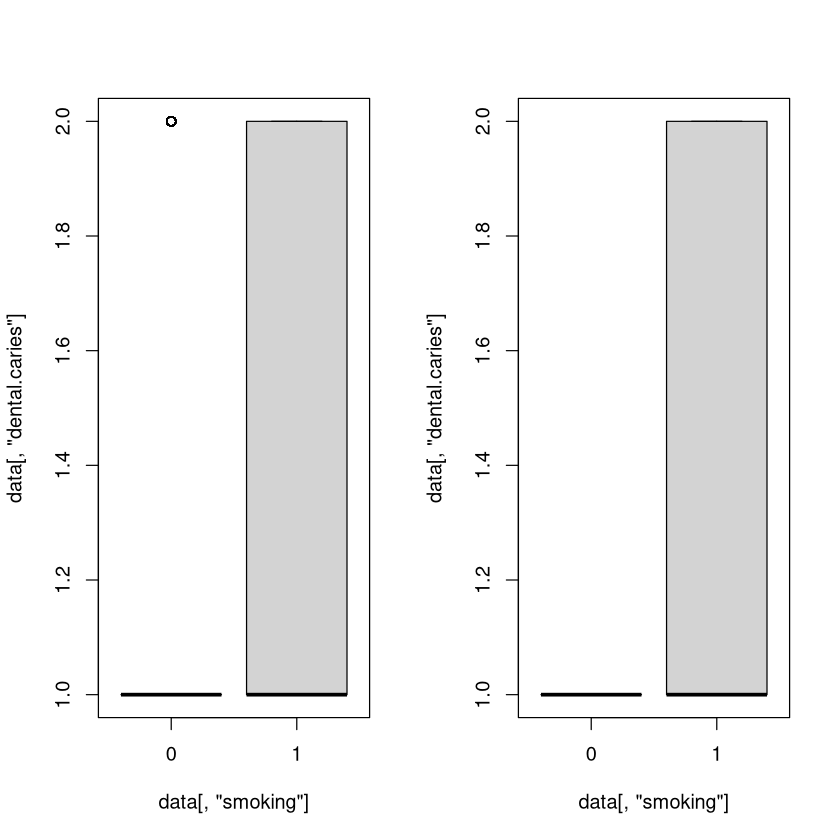

In [159]:
par(mfrow=c(1,2))
boxplot(data[,"dental.caries"] ~ data[,"smoking"])
boxplot(data[,"dental.caries"] ~ data[,"smoking"],outline=FALSE)

Show contengency table of people with dental caries.

In [160]:
round(table(data[,c("dental.caries","smoking")]))

             smoking
dental.caries     0     1
            0 28862 14949
            1  6375  5506

In [162]:
round(table(data[,c("dental.caries","smoking")])/summary(data[,"dental.caries"])*100)

             smoking
dental.caries  0  1
            0 66 34
            1 54 46

### Tartar variable

In [163]:
data[,"tartar"] <- as.factor(data[,"tartar"])

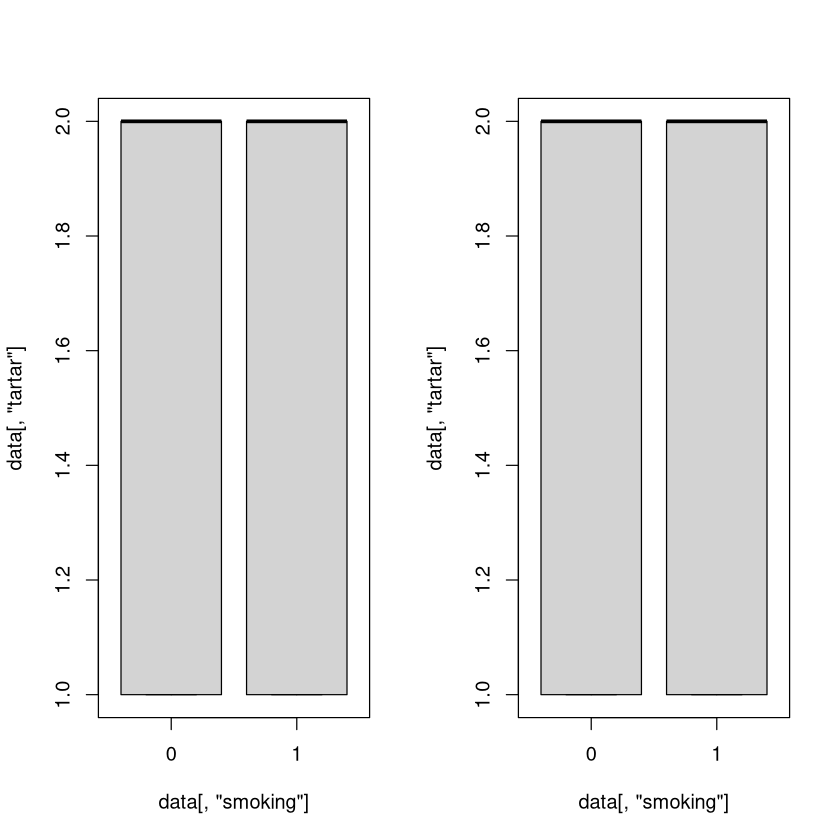

In [164]:
par(mfrow=c(1,2))
boxplot(data[,"tartar"] ~ data[,"smoking"])
boxplot(data[,"tartar"] ~ data[,"smoking"],outline=FALSE)

In [165]:
round(table(data[,c("tartar","smoking")]))

      smoking
tartar     0     1
     N 16977  7775
     Y 18260 12680

In [166]:
round(table(data[,c("tartar","smoking")])/summary(data[,"tartar"])*100)

      smoking
tartar  0  1
     N 69 31
     Y 59 41

## Machine learning model data

In [128]:
names(model.data)

[1] "smoking"             "gender"              "age"                
 [4] "height.cm."          "weight.kg."          "systolic"           
 [7] "relaxation"          "fasting.blood.sugar" "triglyceride"       
[10] "HDL"                 "hemoglobin"          "serum.creatinine"   
[13] "ALT"                 "Gtp"

In [129]:
summary(model.data)

    smoking       gender         age          height.cm.      weight.kg.    
 Min.   :0.0000   F:20291   Min.   :20.00   Min.   :130.0   Min.   : 30.00  
 1st Qu.:0.0000   M:35401   1st Qu.:40.00   1st Qu.:160.0   1st Qu.: 55.00  
 Median :0.0000             Median :40.00   Median :165.0   Median : 65.00  
 Mean   :0.3673             Mean   :44.18   Mean   :164.6   Mean   : 65.86  
 3rd Qu.:1.0000             3rd Qu.:55.00   3rd Qu.:170.0   3rd Qu.: 75.00  
 Max.   :1.0000             Max.   :85.00   Max.   :190.0   Max.   :135.00  
                                                                            
    systolic       relaxation  fasting.blood.sugar  triglyceride  
 Min.   : 71.0   Min.   : 40   Min.   : 46.00      Min.   :  8.0  
 1st Qu.:112.0   1st Qu.: 70   1st Qu.: 89.00      1st Qu.: 74.0  
 Median :120.0   Median : 76   Median : 96.00      Median :108.0  
 Mean   :121.5   Mean   : 76   Mean   : 99.31      Mean   :126.7  
 3rd Qu.:130.0   3rd Qu.: 82   3rd Qu.:104.00    